# Final Project

## Chance Gunter A02232323 and Colby Stam A02286735

In [7]:
# from google.colab import drive
# drive.mount('/content/drive') # needs to run on the first run and then be commented out

# !pip install psycopg2
# !pip install pymssql

import os
import re
import sys
import pandas as pd
import numpy as np
import psycopg2
import pymssql
from datetime import date, timedelta
from datetime import datetime
import chardet

# original_path = r'/content/drive/MyDrive/Colab Notebooks/DATA 5330/Final Project'
#downloads_path = r'C:\Repository\Daily_Repo\Spring 24\DATA 5330\Week 15'

# downloads_path = os.getcwd()

# Check if the directory exists
#if not os.path.exists(downloads_path):
    # If not, create it
#    os.makedirs(downloads_path)

#os.chdir(downloads_path)

### Data Base Connections MSSManagementStudio and Postgres RDS

In [8]:
conn_sch = pymssql.connect(
        host='stairway.usu.edu',
        user='5330user',
        password='pipelinesnow',
        database='ironwill',
        autocommit=True
        )

# conn = psycopg2.connect(
#     database="iwdm",
#     user='colbystam',
#     password='LetsQueryThisIsh!',
#     host='database-5330.csazocp9on00.us-west-1.rds.amazonaws.com',
#     port= '5432'
# )

In [4]:
conn = psycopg2.connect(
    database="iwdm",
    user='colbystam',
    password='LetsQueryThisIsh!',
    host='database-5330.csazocp9on00.us-west-1.rds.amazonaws.com',
    port= '5432'
)
conn.autocommit = True
cursor = conn.cursor()

### create tables
queries = [
    """
    CREATE TABLE IF NOT EXISTS team (
        team_pk SERIAL PRIMARY KEY,
        team_id VARCHAR(3),
        team_name VARCHAR(255),
        team_name_short VARCHAR(255),
        team_id_pfr VARCHAR(255)
    );
    """,
    """
    CREATE TABLE IF NOT EXISTS conference (
        conference_id INTEGER PRIMARY KEY,
        conference_name VARCHAR(255)
    );
    """,
    """
    CREATE TABLE IF NOT EXISTS division (
        division_id INTEGER PRIMARY KEY,
        division_name VARCHAR(255)
    );
    """,
    """
    CREATE TABLE IF NOT EXISTS stadium (
        stadium_name VARCHAR(255) PRIMARY KEY,
        stadium_location VARCHAR(255),
        stadium_open INTEGER,
        stadium_close INTEGER,
        stadium_type VARCHAR(50),
        stadium_address VARCHAR(255),
        stadium_capacity INTEGER,
        stadium_surface VARCHAR(255),
        stadium_weather_station_code VARCHAR(50),
        latitude NUMERIC NULL,
        longitude NUMERIC NULL,
        elevation NUMERIC NULL
    );
    """,
    """
    CREATE TABLE IF NOT EXISTS game (
        game_id VARCHAR PRIMARY KEY,
        schedule_date DATE,
        schedule_season INTEGER,
        schedule_week VARCHAR(255),
        schedule_playoff BOOLEAN,
        team_home_id VARCHAR(255),
        team_away_id VARCHAR(255),
        team_favorite_id VARCHAR(255),
        stadium_name VARCHAR(255),
        spread_favorite NUMERIC,
        over_under_line NUMERIC,
        stadium_neutral BOOLEAN,
        weather_temperature INTEGER,
        weather_wind_mph INTEGER,
        weather_humidity INTEGER,
        weather_detail VARCHAR(255),
        score_home INTEGER,
        score_away INTEGER
    );
    """,
    """
    CREATE TABLE IF NOT EXISTS customer (
        customer_id INTEGER PRIMARY KEY,
        first_name VARCHAR(255),
        last_name VARCHAR(255),
        customer_age INTEGER,
        customer_type VARCHAR(50),
        customer_since INTEGER,
        customer_income INTEGER,
        household_size INTEGER,
        mode_color VARCHAR(50)
    );
    """,
    """
    CREATE TABLE IF NOT EXISTS bet (
        bet_id INTEGER PRIMARY KEY,
        customer_id INTEGER REFERENCES customer (customer_id),
        game_id VARCHAR REFERENCES game (game_id),
        bet_amount NUMERIC(10,2),
        bet_on VARCHAR(255),
        over_under_line NUMERIC,
        bet_on_id VARCHAR(50),
        commission NUMERIC(10,2),
        winner_ou VARCHAR(50),
        winner_line VARCHAR(50),
        result VARCHAR(50)
    );
    """,
    """
    CREATE TABLE IF NOT EXISTS team_conference_division (
        team_id VARCHAR NOT NULL,
        conference_id INTEGER NOT NULL,
        division_id INTEGER NOT NULL,
        FOREIGN KEY (conference_id) REFERENCES conference (conference_id),
        FOREIGN KEY (division_id) REFERENCES division (division_id)
    );
    """
]

for query in queries:
    try:
        cursor.execute(query)
        print("Query: \n", query, "\n Executed successfully!!\n")
    except (Exception, psycopg2.DatabaseError) as error:
        print(f"Error: {error}")

cursor.close()
conn.close()



Query: 
 
    CREATE TABLE IF NOT EXISTS team (
        team_pk SERIAL PRIMARY KEY,
        team_id VARCHAR(3),
        team_name VARCHAR(255),
        team_name_short VARCHAR(255),
        team_id_pfr VARCHAR(255)
    );
     
 Executed successfully!!

Query: 
 
    CREATE TABLE IF NOT EXISTS conference (
        conference_id INTEGER PRIMARY KEY,
        conference_name VARCHAR(255)
    );
     
 Executed successfully!!

Query: 
 
    CREATE TABLE IF NOT EXISTS division (
        division_id INTEGER PRIMARY KEY,
        division_name VARCHAR(255)
    );
     
 Executed successfully!!

Query: 
 
    CREATE TABLE IF NOT EXISTS stadium (
        stadium_name VARCHAR(255) PRIMARY KEY,
        stadium_location VARCHAR(255),
        stadium_open INTEGER,
        stadium_close INTEGER,
        stadium_type VARCHAR(50),
        stadium_address VARCHAR(255),
        stadium_capacity INTEGER,
        stadium_surface VARCHAR(255),
        stadium_weather_station_code VARCHAR(50),
        latitu

### Data Load

In [9]:
df_lst = []

# Path Files
spread_scores = pd.read_csv('spread_scores.csv')
nfl_teams = pd.read_csv('nfl_teams.csv')
with open('nfl_stadiums.csv', 'rb') as f:
    result = chardet.detect(f.read())

nfl_stadiums = pd.read_csv('nfl_stadiums.csv', encoding='ISO-8859-1')

#Server Files
query = "SELECT * FROM betlog"
betlog = pd.read_sql(query, conn_sch)
query = "SELECT * FROM customer_table"
customers = pd.read_sql(query, conn_sch)

df_lst.append(spread_scores)
df_lst.append(nfl_teams)
df_lst.append(nfl_stadiums)
df_lst.append(betlog)
df_lst.append(customers)

for df in df_lst:
    df.columns = df.columns.str.lower()
    print(df.head().to_string())

C:\Users\chance.gunter\AppData\Local\Temp\ipykernel_26708\4268579989.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  betlog = pd.read_sql(query, conn_sch)


  schedule_date  schedule_season schedule_week  schedule_playoff          team_home  score_home  score_away             team_away team_favorite_id  spread_favorite  over_under_line               stadium  stadium_neutral  weather_temperature  weather_wind_mph  weather_humidity weather_detail
0      9/3/2000             2000             1             False    Atlanta Falcons          36          28   San Francisco 49ers              ATL             -6.5             46.5          Georgia Dome            False                 72.0               0.0               NaN         indoor
1      9/3/2000             2000             1             False      Buffalo Bills          16          13      Tennessee Titans              BUF             -1.0             40.0  Ralph Wilson Stadium            False                 70.0               7.0              82.0            NaN
2      9/3/2000             2000             1             False   Cleveland Browns           7          27  Jacksonville Ja

C:\Users\chance.gunter\AppData\Local\Temp\ipykernel_26708\4268579989.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers = pd.read_sql(query, conn_sch)


### Data Transformation

In [10]:
team_tb = nfl_teams[['team_id', 'team_name', 'team_name_short', 'team_id_pfr']].copy()
team_tb['team_id'] = np.where(team_tb['team_id'] == 'JAX', 'JAC', team_tb['team_id'])
team_tb['team_id'] = np.where(team_tb['team_id'] == 'LVR', 'LV', team_tb['team_id'])

conference_tb = (nfl_teams[['team_conference']].drop_duplicates()).copy()
conference_tb['conference_id'] = conference_tb.index + 1

division_tb = (nfl_teams[['team_division']].drop_duplicates()).copy()
division_tb['division_id'] = division_tb.index + 1

team_con_div_tb = nfl_teams[['team_id', 'team_conference', 'team_division']].copy()
team_con_div_tb['team_id'] = np.where(team_con_div_tb['team_id'] == 'JAX', 'JAC', team_con_div_tb['team_id'])
team_con_div_tb['team_id'] = np.where(team_con_div_tb['team_id'] == 'LVR', 'LV', team_con_div_tb['team_id'])
team_con_div_tb = team_con_div_tb.merge(conference_tb, left_on='team_conference', right_on='team_conference', how='left')
team_con_div_tb = team_con_div_tb.merge(division_tb, left_on='team_division', right_on='team_division', how='left')
team_con_div_tb = team_con_div_tb[['team_id', 'conference_id', 'division_id']]

stadium_tb = nfl_stadiums[['stadium_name', 'stadium_location', 'stadium_open', 'stadium_close',
                           'stadium_type', 'stadium_address', 'stadium_capacity', 'stadium_surface',
                           'stadium_weather_station_code', 'latitude', 'longitude', 'elevation']].copy()

stadium_tb['stadium_capacity'] = pd.to_numeric(stadium_tb['stadium_capacity'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)
stadium_tb['latitude'] = pd.to_numeric(stadium_tb['latitude'], errors='coerce')
stadium_tb['longitude'] = pd.to_numeric(stadium_tb['longitude'], errors='coerce')
stadium_tb['elevation'] = pd.to_numeric(stadium_tb['elevation'], errors='coerce')

game_tb = spread_scores[['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
                         'team_home', 'team_away', 'team_favorite_id', 'stadium',
                         'spread_favorite', 'over_under_line', 'stadium_neutral', 'weather_temperature',
                         'weather_wind_mph', 'weather_humidity', 'weather_detail', 'score_home', 'score_away']].copy()

game_tb['team_away'] = np.where(game_tb['team_away'] == 'JAX', 'JAC', game_tb['team_away'])
game_tb['team_away'] = np.where(game_tb['team_away'] == 'LVR', 'LV', game_tb['team_away'])
game_tb['team_home'] = np.where(game_tb['team_home'] == 'JAX', 'JAC', game_tb['team_home'])
game_tb['team_home'] = np.where(game_tb['team_home'] == 'LVR', 'LV', game_tb['team_home'])

game_tb['week_number'] = pd.to_numeric(game_tb['schedule_week'], errors='coerce').fillna(0)

conditions = [
    (game_tb['schedule_week'] == 'Wildcard'),
    (game_tb['schedule_week'] == 'Division'),
    (game_tb['schedule_week'] == 'Conference'),
    (game_tb['schedule_week'] == 'Superbowl'),
    ((game_tb['week_number'].astype(int) < 10) & (game_tb['week_number'].astype(int) > 0)),
    (game_tb['week_number'].astype(int) >= 10)
]

choices = [
    '19',
    '20',
    '21',
    '22',
    '0' + game_tb['week_number'].astype(int).astype(str),
    game_tb['week_number'].astype(int).astype(str)
]

game_tb['schedule_week_id'] = np.select(conditions, choices)
print(game_tb.schedule_week_id.unique())

game_tb = game_tb.merge(team_tb[['team_id', 'team_name']], left_on='team_home', right_on='team_name', how='left')
game_tb = game_tb.merge(team_tb[['team_id', 'team_name']], left_on='team_away', right_on='team_name', how='left')
game_tb.rename(columns={'team_id_x': 'team_home_id', 'team_id_y': 'team_away_id',
                        'stadium': 'stadium_name'}, inplace=True)

game_tb['game_id'] = game_tb['schedule_season'].astype(str) + game_tb['schedule_week_id'].astype(str) +\
                '-' + game_tb['team_home_id'].astype(str) + '-' + game_tb['team_away_id'].astype(str)
game_tb = game_tb[['game_id', 'schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
                   'team_home_id', 'team_away_id', 'team_favorite_id', 'stadium_name',
                   'spread_favorite', 'over_under_line', 'stadium_neutral', 'weather_temperature',
                   'weather_wind_mph', 'weather_humidity', 'weather_detail', 'score_home', 'score_away']]
game_tb['schedule_date'] = pd.to_datetime(game_tb['schedule_date'])
game_tb = game_tb[game_tb['schedule_date'] >= '2015-09-09']

game_tb['schedule_date'] = pd.to_datetime(game_tb['schedule_date'])
game_tb['schedule_season'] = game_tb['schedule_season'].astype(int)
game_tb['score_home'] = pd.to_numeric(game_tb['score_home'], errors='coerce').fillna(0).astype(int)
game_tb['score_away'] = pd.to_numeric(game_tb['score_away'], errors='coerce').fillna(0).astype(int)

print(game_tb.head().to_string())

customer_tb = customers.copy()
customer_tb['first_name'] = customer_tb['customer_name'].str.split(' ').str[0]
customer_tb['last_name'] = customer_tb['customer_name'].str.split(' ').str[1]
customer_tb.drop(columns=['customer_name'], inplace=True)

bet_tb = betlog.copy()
bet_tb['game_id'] = bet_tb['game_id'].str.strip()
bet_tb = bet_tb.merge(game_tb[['game_id', 'score_home', 'score_away', 'team_home_id', 'team_away_id', 'over_under_line']], on='game_id', how='left')
bet_tb = bet_tb.merge(team_tb[['team_id', 'team_name']], left_on='bet_on', right_on='team_name', how='left')
bet_tb.rename(columns={'team_id': 'bet_on_id'}, inplace=True)
bet_tb = bet_tb[['bet_id', 'customer_id', 'game_id', 'bet_on_id', 'bet_on', 'bet_amount', 'score_home', 'score_away',
                 'team_home_id', 'team_away_id', 'over_under_line']]
bet_tb.to_csv('bet_tb.csv', index=False)

bet_tb['bet_on_id'] = np.where(bet_tb['bet_on_id'].isnull(), bet_tb['bet_on'].str.upper(), bet_tb['bet_on_id'])

bet_tb['commission'] = bet_tb.apply(lambda row: 
                                    0.1 * row['bet_amount'] if row['bet_amount'] <= 1000 else 
                                    (0.1 * 1000 + 0.08 * (row['bet_amount'] - 1000)) if row['bet_amount'] <= 5000 else 
                                    (0.1 * 1000 + 0.08 * 4000 + 0.06 * (row['bet_amount'] - 5000)), 
                                    axis=1)

bet_tb['winner_ou'] = np.where((bet_tb['score_home'] + bet_tb['score_away']) > bet_tb['over_under_line'], 'over', 
                               np.where((bet_tb['score_home'] + bet_tb['score_away']) < bet_tb['over_under_line'], 'under', 'push'))
bet_tb['winner_line'] = np.where(bet_tb['score_home'] > bet_tb['score_away'],'home', np.where(bet_tb['score_home'] < bet_tb['score_away'],'away', 'push'))


condition = [
    ((bet_tb['bet_on_id'] == bet_tb['team_home_id']) & (bet_tb['winner_line'] == 'home')) |
    ((bet_tb['bet_on_id'] == bet_tb['team_away_id']) & (bet_tb['winner_line'] == 'away')) |
    ((bet_tb['bet_on_id'] == 'over') & (bet_tb['winner_ou'] == 'over')) |
    ((bet_tb['bet_on_id'] == 'under') & (bet_tb['winner_ou'] == 'under')),
    ((bet_tb['bet_on_id'] == bet_tb['team_home_id']) & (bet_tb['winner_line'] == 'away')) |
    ((bet_tb['bet_on_id'] == bet_tb['team_away_id']) & (bet_tb['winner_line'] == 'home')) |
    ((bet_tb['bet_on_id'] == 'over') & (bet_tb['winner_ou'] == 'under')) |
    ((bet_tb['bet_on_id'] == 'under') & (bet_tb['winner_ou'] == 'over')),
]
values = [
    'win', 'loss'
]
bet_tb['result'] = np.select(condition, values, default='push')

bet_tb['bet_amount'] = pd.to_numeric(bet_tb['bet_amount'], errors='coerce').fillna(0).astype(int)
bet_tb['commission'] = bet_tb['commission'].astype(float)
bet_tb['game_id'] = bet_tb['game_id'].str.strip()


print(bet_tb.head(50).to_string())

missing_game_ids = (bet_tb[~bet_tb['customer_id'].isin(customer_tb['customer_id'])]['customer_id']).unique()
print(missing_game_ids)
(game_tb[game_tb['schedule_date'] >= '2022-09-01']).to_csv('game_tb.csv', index=False)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '19' '20' '21' '22' '18']
             game_id schedule_date  schedule_season schedule_week  schedule_playoff team_home_id team_away_id team_favorite_id                   stadium_name  spread_favorite  over_under_line  stadium_neutral  weather_temperature  weather_wind_mph  weather_humidity weather_detail  score_home  score_away
3989   201501-NE-PIT    2015-09-10             2015             1             False           NE          PIT               NE               Gillette Stadium             -7.0             51.0            False                 64.0               9.0               NaN           rain          28          21
3990   201501-ARI-NO    2015-09-13             2015             1             False          ARI           NO              ARI  University of Phoenix Stadium             -2.5             48.5            False                 72.0               0.0               NaN         ind

### DB Upload

#### Quick upload

In [7]:
conn = psycopg2.connect(
    database="iwdm",
    user='colbystam',
    password='LetsQueryThisIsh!',
    host='database-5330.csazocp9on00.us-west-1.rds.amazonaws.com',
    port= '5432'
)

queries = {
    'team': '''
    INSERT INTO team (team_id, team_name, team_name_short, team_id_pfr) 
            VALUES (%(team_id)s, %(team_name)s, %(team_name_short)s, %(team_id_pfr)s)
    ''',
    'conference': '''
    INSERT INTO conference (conference_id, conference_name) 
            VALUES (%(conference_id)s, %(team_conference)s)
    ''',
    'division': '''
    INSERT INTO division (division_id, division_name) 
            VALUES (%(division_id)s, %(team_division)s)
    ''',
    'team_con_div': '''
    INSERT INTO team_conference_division (team_id, conference_id, division_id) 
            VALUES (%(team_id)s, %(conference_id)s, %(division_id)s)
    ''',
    'stadium': '''
    INSERT INTO stadium (stadium_name, stadium_location, stadium_open, stadium_close, stadium_type,
                         stadium_address, stadium_capacity, stadium_surface, stadium_weather_station_code,
                         latitude, longitude, elevation) 
            VALUES (%(stadium_name)s, %(stadium_location)s, %(stadium_open)s, %(stadium_close)s,
                    %(stadium_type)s, %(stadium_address)s, %(stadium_capacity)s, %(stadium_surface)s,
                    %(stadium_weather_station_code)s, %(latitude)s, %(longitude)s, %(elevation)s)
    ''',
    'game': '''
    INSERT INTO game (game_id, schedule_date, schedule_season, schedule_week, schedule_playoff,
                      team_home_id, team_away_id, team_favorite_id, stadium_name, spread_favorite,
                      over_under_line, stadium_neutral, weather_temperature, weather_wind_mph,
                        weather_humidity, weather_detail, score_home, score_away) 
            VALUES (%(game_id)s, %(schedule_date)s, %(schedule_season)s, %(schedule_week)s,
                    %(schedule_playoff)s, %(team_home_id)s, %(team_away_id)s, %(team_favorite_id)s,
                    %(stadium_name)s, %(spread_favorite)s, %(over_under_line)s, %(stadium_neutral)s,
                    %(weather_temperature)s, %(weather_wind_mph)s, %(weather_humidity)s,
                    %(weather_detail)s, %(score_home)s, %(score_away)s)
    ''',
    'customer': '''
    INSERT INTO customer (customer_id, first_name, last_name, customer_age, customer_type, customer_since, customer_income,
                     household_size, mode_color) 
    VALUES (%(customer_id)s, %(first_name)s, %(last_name)s, %(customer_age)s, %(customer_type)s, %(customer_since)s,
            %(customer_income)s, %(household_size)s, %(mode_color)s)
    ''',
    
     'bet': '''
    INSERT INTO bet (bet_id, customer_id, game_id, bet_amount, bet_on, over_under_line, bet_on_id,
                     commission, winner_ou, winner_line, result) 
    VALUES (%(bet_id)s, %(customer_id)s, %(game_id)s, %(bet_amount)s, %(bet_on)s, %(over_under_line)s,
            %(bet_on_id)s, %(commission)s, %(winner_ou)s, %(winner_line)s, %(result)s)
    '''
}

dataframes = {
    'team': team_tb,
    'conference': conference_tb,
    'division': division_tb,
    'team_con_div': team_con_div_tb,
    'stadium': stadium_tb,
    'customer': customer_tb,
    'game': game_tb,
    'bet': bet_tb
}

# For each table, execute the corresponding query with the data from the corresponding dataframe
for table, query in queries.items():
    print(f"Inserting data into '{table}' table...")
    df = dataframes[table]
    df.replace({np.nan: None}, inplace=True)
   
    try:
        num_rows = len(df)
        print(f'Number of rows to be uploaded to {table}:', num_rows)
        first = 0
        if num_rows < 500:
            last = num_rows
        else:
            last = 500
        i = 1

        while last <= num_rows:
            cursor = conn.cursor()

            print('iteration', i)
            print(first)
            print(last)

            upload_list_batch = df[first:last]
            print(upload_list_batch)

            cursor.executemany(query, upload_list_batch.to_dict('records'))
            conn.commit()
            cursor.close()
            first += 500
            last += 500
            if last > num_rows and last != (num_rows + 500):
                last = num_rows
            i += 1

        print(f"Data inserted into '{table}' table successfully!")

    except Exception as e:
        conn.rollback()
        print(f"Error inserting data into '{table}' table:", e)
        
        
conn.close()


Inserting data into 'team' table...
Number of rows to be uploaded to team: 44
iteration 1
0
44
   team_id                 team_name team_name_short team_id_pfr
0      ARI         Arizona Cardinals       Cardinals         CRD
1      ATL           Atlanta Falcons         Falcons         ATL
2      IND           Baltimore Colts           Colts         CLT
3      BAL          Baltimore Ravens          Ravens         RAV
4       NE           Boston Patriots        Patriots         NWE
5      BUF             Buffalo Bills           Bills         BUF
6      CAR         Carolina Panthers        Panthers         CAR
7      CHI             Chicago Bears           Bears         CHI
8      CIN        Cincinnati Bengals         Bengals         CIN
9      CLE          Cleveland Browns          Browns         CLE
10     DAL            Dallas Cowboys         Cowboys         DAL
11     DEN            Denver Broncos         Broncos         DEN
12     DET             Detroit Lions           Lions        

Data inserted into 'stadium' table successfully!
Inserting data into 'game' table...
Number of rows to be uploaded to game: 2173
iteration 1
0
500
             game_id schedule_date  schedule_season schedule_week  \
3989   201501-NE-PIT    2015-09-10             2015             1   
3990   201501-ARI-NO    2015-09-13             2015             1   
3991  201501-BUF-IND    2015-09-13             2015             1   
3992   201501-CHI-GB    2015-09-13             2015             1   
3993  201501-DAL-NYG    2015-09-13             2015             1   
...              ...           ...              ...           ...   
4484  201616-CLE-LAC    2016-12-24             2016            16   
4485   201616-GB-MIN    2016-12-24             2016            16   
4486  201616-HOU-CIN    2016-12-24             2016            16   
4487  201616-JAC-TEN    2016-12-24             2016            16   
4488   201616-LAR-SF    2016-12-24             2016            16   

      schedule_playoff t

iteration 3
1000
1500
             game_id schedule_date  schedule_season schedule_week  \
4989  201814-HOU-IND    2018-12-09             2018            14   
4990   201814-KC-BAL    2018-12-09             2018            14   
4991  201814-LAC-CIN    2018-12-09             2018            14   
4992   201814-MIA-NE    2018-12-09             2018            14   
4993   201814-LV-PIT    2018-12-09             2018            14   
...              ...           ...              ...           ...   
5484   202011-TB-LAR    2020-11-23             2020            11   
5485  202012-DAL-WAS    2020-11-26             2020            12   
5486  202012-DET-HOU    2020-11-26             2020            12   
5487   202012-ATL-LV    2020-11-29             2020            12   
5488  202012-BUF-LAC    2020-11-29             2020            12   

      schedule_playoff team_home_id team_away_id team_favorite_id  \
4989             False          HOU          IND              HOU   
4990       

Data inserted into 'game' table successfully!
Inserting data into 'customer' table...
Number of rows to be uploaded to customer: 2000
iteration 1
0
500
     customer_id  customer_age customer_type  customer_since  customer_income  \
0              1            31        online            2019            90000   
1              2            45         phone            2020           102000   
2              3            31         local            2021           113000   
3              4            34        online            2022           260000   
4              5            27         local            2018            65000   
..           ...           ...           ...             ...              ...   
495          496            50         local            2017            62000   
496          497            55         local            2018            79000   
497          498            46         local            2022           107000   
498          499            38        

iteration 2
500
1000
     bet_id  customer_id        game_id bet_on_id              bet_on  \
500     501          279  202201-ARI-KC       ARI   Arizona Cardinals   
501     502          282  202201-ARI-KC     UNDER               under   
502     503          284  202201-ARI-KC       ARI   Arizona Cardinals   
503     504          286  202201-ARI-KC     UNDER               under   
504     505          289  202201-ARI-KC       ARI   Arizona Cardinals   
..      ...          ...            ...       ...                 ...   
995     996          565  202201-ATL-NO     UNDER               under   
996     997          566  202201-ATL-NO       ATL     Atlanta Falcons   
997     998          568  202201-ATL-NO        NO  New Orleans Saints   
998     999          570  202201-ATL-NO        NO  New Orleans Saints   
999    1000          580  202201-ATL-NO      OVER                over   

     bet_amount  score_home  score_away team_home_id team_away_id  \
500         125          21      

iteration 6
2500
3000
      bet_id  customer_id         game_id bet_on_id               bet_on  \
2500    2501         1728  202201-CIN-PIT       CIN   Cincinnati Bengals   
2501    2502         1732  202201-CIN-PIT       PIT  Pittsburgh Steelers   
2502    2503         1733  202201-CIN-PIT       PIT  Pittsburgh Steelers   
2503    2504         1734  202201-CIN-PIT      OVER                 over   
2504    2505         1737  202201-CIN-PIT       CIN   Cincinnati Bengals   
...      ...          ...             ...       ...                  ...   
2995    2996         1993   202201-DAL-TB      OVER                 over   
2996    2997         1996   202201-DAL-TB       DAL       Dallas Cowboys   
2997    2998            4  202201-DET-PHI       DET        Detroit Lions   
2998    2999            6  202201-DET-PHI       PHI  Philadelphia Eagles   
2999    3000            8  202201-DET-PHI       DET        Detroit Lions   

      bet_amount  score_home  score_away team_home_id team_away_i

iteration 10
4500
5000
      bet_id  customer_id        game_id bet_on_id                bet_on  \
4500    4501         1261  202201-MIA-NE     UNDER                 under   
4501    4502         1262  202201-MIA-NE        NE  New England Patriots   
4502    4503         1263  202201-MIA-NE        NE  New England Patriots   
4503    4504         1264  202201-MIA-NE       MIA        Miami Dolphins   
4504    4505         1267  202201-MIA-NE        NE  New England Patriots   
...      ...          ...            ...       ...                   ...   
4995    4996         1604  202201-MIN-GB        GB     Green Bay Packers   
4996    4997         1605  202201-MIN-GB        GB     Green Bay Packers   
4997    4998         1610  202201-MIN-GB       MIN     Minnesota Vikings   
4998    4999         1619  202201-MIN-GB     UNDER                 under   
4999    5000         1622  202201-MIN-GB       MIN     Minnesota Vikings   

      bet_amount  score_home  score_away team_home_id team_away_

iteration 14
6500
7000
      bet_id  customer_id         game_id bet_on_id                bet_on  \
6500    6501          608  202201-SEA-DEN      OVER                  over   
6501    6502          616  202201-SEA-DEN       DEN        Denver Broncos   
6502    6503          617  202201-SEA-DEN       DEN        Denver Broncos   
6503    6504          621  202201-SEA-DEN       DEN        Denver Broncos   
6504    6505          622  202201-SEA-DEN       DEN        Denver Broncos   
...      ...          ...             ...       ...                   ...   
6995    6996          999   202202-KC-LAC      OVER                  over   
6996    6997         1002   202202-KC-LAC       LAC  Los Angeles Chargers   
6997    6998         1008   202202-KC-LAC       LAC  Los Angeles Chargers   
6998    6999         1009   202202-KC-LAC       LAC  Los Angeles Chargers   
6999    7000         1014   202202-KC-LAC        KC    Kansas City Chiefs   

      bet_amount  score_home  score_away team_home_i

iteration 18
8500
9000
      bet_id  customer_id         game_id bet_on_id                 bet_on  \
8500    8501          216  202202-DEN-HOU      OVER                   over   
8501    8502          219  202202-DEN-HOU       HOU         Houston Texans   
8502    8503          221  202202-DEN-HOU       HOU         Houston Texans   
8503    8504          226  202202-DEN-HOU       DEN         Denver Broncos   
8504    8505          227  202202-DEN-HOU       DEN         Denver Broncos   
...      ...          ...             ...       ...                    ...   
8995    8996          512  202202-DET-WAS       WAS  Washington Commanders   
8996    8997          514  202202-DET-WAS     UNDER                  under   
8997    8998          515  202202-DET-WAS       WAS  Washington Commanders   
8998    8999          518  202202-DET-WAS       DET          Detroit Lions   
8999    9000          523  202202-DET-WAS       WAS  Washington Commanders   

      bet_amount  score_home  score_away

iteration 22
10500
11000
       bet_id  customer_id         game_id bet_on_id             bet_on  \
10500   10501         1368   202202-LV-ARI       ARI  Arizona Cardinals   
10501   10502         1370   202202-LV-ARI        LV  Las Vegas Raiders   
10502   10503         1379   202202-LV-ARI        LV  Las Vegas Raiders   
10503   10504         1385   202202-LV-ARI       ARI  Arizona Cardinals   
10504   10505         1390   202202-LV-ARI      PUSH               push   
...       ...          ...             ...       ...                ...   
10995   10996         1728  202202-LAR-ATL       ATL    Atlanta Falcons   
10996   10997         1737  202202-LAR-ATL       ATL    Atlanta Falcons   
10997   10998         1738  202202-LAR-ATL       ATL    Atlanta Falcons   
10998   10999         1749  202202-LAR-ATL       LAR   Los Angeles Rams   
10999   11000         1750  202202-LAR-ATL       LAR   Los Angeles Rams   

       bet_amount  score_home  score_away team_home_id team_away_id  \
105

iteration 26
12500
13000
       bet_id  customer_id         game_id bet_on_id               bet_on  \
12500   12501          741   202202-SF-SEA        SF  San Francisco 49ers   
12501   12502          755   202202-SF-SEA      OVER                 over   
12502   12503          759   202202-SF-SEA      OVER                 over   
12503   12504          762   202202-SF-SEA        SF  San Francisco 49ers   
12504   12505          764   202202-SF-SEA        SF  San Francisco 49ers   
...       ...          ...             ...       ...                  ...   
12995   12996         1093  202202-BUF-TEN      OVER                 over   
12996   12997         1096  202202-BUF-TEN     UNDER                under   
12997   12998         1099  202202-BUF-TEN       BUF        Buffalo Bills   
12998   12999         1118  202202-BUF-TEN       TEN     Tennessee Titans   
12999   13000         1119  202202-BUF-TEN       BUF        Buffalo Bills   

       bet_amount  score_home  score_away team_hom

iteration 30
14500
15000
       bet_id  customer_id         game_id bet_on_id              bet_on  \
14500   14501         1959  202203-ARI-LAR       LAR    Los Angeles Rams   
14501   14502         1992  202203-ARI-LAR       LAR    Los Angeles Rams   
14502   14503         1997  202203-ARI-LAR       LAR    Los Angeles Rams   
14503   14504            1   202203-CAR-NO        NO  New Orleans Saints   
14504   14505            3   202203-CAR-NO        NO  New Orleans Saints   
...       ...          ...             ...       ...                 ...   
14995   14996          153  202203-CHI-HOU      OVER                over   
14996   14997          154  202203-CHI-HOU       HOU      Houston Texans   
14997   14998          160  202203-CHI-HOU     UNDER               under   
14998   14999          168  202203-CHI-HOU       CHI       Chicago Bears   
14999   15000          171  202203-CHI-HOU       HOU      Houston Texans   

       bet_amount  score_home  score_away team_home_id team_aw

iteration 34
16500
17000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
16500   16501         1334  202203-LAC-JAC       LAC  Los Angeles Chargers   
16501   16502         1337  202203-LAC-JAC       JAC  Jacksonville Jaguars   
16502   16503         1338  202203-LAC-JAC       LAC  Los Angeles Chargers   
16503   16504         1341  202203-LAC-JAC       JAC  Jacksonville Jaguars   
16504   16505         1342  202203-LAC-JAC      OVER                  over   
...       ...          ...             ...       ...                   ...   
16995   16996         1658  202203-MIA-BUF      OVER                  over   
16996   16997         1660  202203-MIA-BUF       MIA        Miami Dolphins   
16997   16998         1662  202203-MIA-BUF       MIA        Miami Dolphins   
16998   16999         1671  202203-MIA-BUF      OVER                  over   
16999   17000         1674  202203-MIA-BUF       BUF         Buffalo Bills   

       bet_amount  score_home  score_a

iteration 38
18500
19000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
18500   18501          862  202203-SEA-ATL       SEA      Seattle Seahawks   
18501   18502          871  202203-SEA-ATL     UNDER                 under   
18502   18503          874  202203-SEA-ATL       ATL       Atlanta Falcons   
18503   18504          875  202203-SEA-ATL       ATL       Atlanta Falcons   
18504   18505          878  202203-SEA-ATL       SEA      Seattle Seahawks   
...       ...          ...             ...       ...                   ...   
18995   18996         1264    202203-TB-GB        GB     Green Bay Packers   
18996   18997         1271    202203-TB-GB        GB     Green Bay Packers   
18997   18998         1273    202203-TB-GB        TB  Tampa Bay Buccaneers   
18998   18999         1277    202203-TB-GB     UNDER                 under   
18999   19000         1279    202203-TB-GB        GB     Green Bay Packers   

       bet_amount  score_home  score_a

iteration 42
20500
21000
       bet_id  customer_id         game_id bet_on_id              bet_on  \
20500   20501          311  202204-CIN-MIA      OVER                over   
20501   20502          312  202204-CIN-MIA       CIN  Cincinnati Bengals   
20502   20503          313  202204-CIN-MIA       MIA      Miami Dolphins   
20503   20504          317  202204-CIN-MIA       CIN  Cincinnati Bengals   
20504   20505          318  202204-CIN-MIA      OVER                over   
...       ...          ...             ...       ...                 ...   
20995   20996          666  202204-ATL-CLE       ATL     Atlanta Falcons   
20996   20997          670  202204-ATL-CLE       ATL     Atlanta Falcons   
20997   20998          684  202204-ATL-CLE      OVER                over   
20998   20999          686  202204-ATL-CLE       CLE    Cleveland Browns   
20999   21000          688  202204-ATL-CLE       ATL     Atlanta Falcons   

       bet_amount  score_home  score_away team_home_id team_aw

iteration 46
22500
23000
       bet_id  customer_id         game_id bet_on_id                 bet_on  \
22500   22501         1444  202204-DAL-WAS       DAL         Dallas Cowboys   
22501   22502         1445  202204-DAL-WAS      OVER                   over   
22502   22503         1456  202204-DAL-WAS       WAS  Washington Commanders   
22503   22504         1459  202204-DAL-WAS      OVER                   over   
22504   22505         1468  202204-DAL-WAS       WAS  Washington Commanders   
...       ...          ...             ...       ...                    ...   
22995   22996         1678  202204-DET-SEA       SEA       Seattle Seahawks   
22996   22997         1683  202204-DET-SEA       SEA       Seattle Seahawks   
22997   22998         1686  202204-DET-SEA       SEA       Seattle Seahawks   
22998   22999         1702  202204-DET-SEA     UNDER                  under   
22999   23000         1703  202204-DET-SEA       SEA       Seattle Seahawks   

       bet_amount  score_h

iteration 50
24500
25000
       bet_id  customer_id        game_id bet_on_id              bet_on  \
24500   24501          868  202204-LV-DEN       DEN      Denver Broncos   
24501   24502          869  202204-LV-DEN     UNDER               under   
24502   24503          874  202204-LV-DEN       DEN      Denver Broncos   
24503   24504          883  202204-LV-DEN        LV   Las Vegas Raiders   
24504   24505          897  202204-LV-DEN        LV   Las Vegas Raiders   
...       ...          ...            ...       ...                 ...   
24995   24996         1045  202204-NO-MIN        NO  New Orleans Saints   
24996   24997         1052  202204-NO-MIN        NO  New Orleans Saints   
24997   24998         1066  202204-NO-MIN      OVER                over   
24998   24999         1067  202204-NO-MIN       MIN   Minnesota Vikings   
24999   25000         1077  202204-NO-MIN     UNDER               under   

       bet_amount  score_home  score_away team_home_id team_away_id  \
245

iteration 54
26500
27000
       bet_id  customer_id        game_id bet_on_id                bet_on  \
26500   26501          138   202204-TB-KC        TB  Tampa Bay Buccaneers   
26501   26502          142   202204-TB-KC        TB  Tampa Bay Buccaneers   
26502   26503          143   202204-TB-KC        TB  Tampa Bay Buccaneers   
26503   26504          164   202204-TB-KC        TB  Tampa Bay Buccaneers   
26504   26505          166   202204-TB-KC     UNDER                 under   
...       ...          ...            ...       ...                   ...   
26995   26996          515  202204-SF-LAR       LAR      Los Angeles Rams   
26996   26997          518  202204-SF-LAR        SF   San Francisco 49ers   
26997   26998          519  202204-SF-LAR        SF   San Francisco 49ers   
26998   26999          528  202204-SF-LAR       LAR      Los Angeles Rams   
26999   27000          531  202204-SF-LAR        SF   San Francisco 49ers   

       bet_amount  score_home  score_away team_hom

iteration 58
28500
29000
       bet_id  customer_id         game_id bet_on_id               bet_on  \
28500   28501         1528  202205-BAL-CIN      OVER                 over   
28501   28502         1529  202205-BAL-CIN       BAL     Baltimore Ravens   
28502   28503         1531  202205-BAL-CIN       CIN   Cincinnati Bengals   
28503   28504         1534  202205-BAL-CIN       BAL     Baltimore Ravens   
28504   28505         1535  202205-BAL-CIN       BAL     Baltimore Ravens   
...       ...          ...             ...       ...                  ...   
28995   28996         1874  202205-BUF-PIT       PIT  Pittsburgh Steelers   
28996   28997         1885  202205-BUF-PIT     UNDER                under   
28997   28998         1886  202205-BUF-PIT       PIT  Pittsburgh Steelers   
28998   28999         1894  202205-BUF-PIT       PIT  Pittsburgh Steelers   
28999   29000         1897  202205-BUF-PIT       BUF        Buffalo Bills   

       bet_amount  score_home  score_away team_hom

iteration 62
30500
31000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
30500   30501          996  202205-JAC-HOU     UNDER                 under   
30501   30502          999  202205-JAC-HOU       JAC  Jacksonville Jaguars   
30502   30503         1002  202205-JAC-HOU       HOU        Houston Texans   
30503   30504         1013  202205-JAC-HOU       HOU        Houston Texans   
30504   30505         1015  202205-JAC-HOU      OVER                  over   
...       ...          ...             ...       ...                   ...   
30995   30996         1327  202205-LAR-DAL     UNDER                 under   
30996   30997         1329  202205-LAR-DAL     UNDER                 under   
30997   30998         1337  202205-LAR-DAL       LAR      Los Angeles Rams   
30998   30999         1338  202205-LAR-DAL       LAR      Los Angeles Rams   
30999   31000         1341  202205-LAR-DAL       DAL        Dallas Cowboys   

       bet_amount  score_home  score_a

iteration 66
32500
33000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
32500   32501          298  202205-NYJ-MIA       MIA        Miami Dolphins   
32501   32502          301  202205-NYJ-MIA       NYJ         New York Jets   
32502   32503          310  202205-NYJ-MIA       MIA        Miami Dolphins   
32503   32504          311  202205-NYJ-MIA     UNDER                 under   
32504   32505          313  202205-NYJ-MIA       NYJ         New York Jets   
...       ...          ...             ...       ...                   ...   
32995   32996          633   202205-TB-ATL       ATL       Atlanta Falcons   
32996   32997          637   202205-TB-ATL        TB  Tampa Bay Buccaneers   
32997   32998          638   202205-TB-ATL      OVER                  over   
32998   32999          646   202205-TB-ATL        TB  Tampa Bay Buccaneers   
32999   33000          647   202205-TB-ATL      OVER                  over   

       bet_amount  score_home  score_a

iteration 70
34500
35000
       bet_id  customer_id         game_id bet_on_id                 bet_on  \
34500   34501         1456  202206-CHI-WAS       WAS  Washington Commanders   
34501   34502         1466  202206-CHI-WAS     UNDER                  under   
34502   34503         1468  202206-CHI-WAS       WAS  Washington Commanders   
34503   34504         1474  202206-CHI-WAS      OVER                   over   
34504   34505         1476  202206-CHI-WAS       CHI          Chicago Bears   
...       ...          ...             ...       ...                    ...   
34995   34996         1784   202206-ATL-SF       ATL        Atlanta Falcons   
34996   34997         1789   202206-ATL-SF       ATL        Atlanta Falcons   
34997   34998         1793   202206-ATL-SF     UNDER                  under   
34998   34999         1801   202206-ATL-SF        SF    San Francisco 49ers   
34999   35000         1809   202206-ATL-SF        SF    San Francisco 49ers   

       bet_amount  score_h

iteration 74
36500
37000
       bet_id  customer_id         game_id bet_on_id              bet_on  \
36500   36501          939   202206-KC-BUF        KC  Kansas City Chiefs   
36501   36502          941   202206-KC-BUF        KC  Kansas City Chiefs   
36502   36503          942   202206-KC-BUF       BUF       Buffalo Bills   
36503   36504          950   202206-KC-BUF      OVER                over   
36504   36505          953   202206-KC-BUF        KC  Kansas City Chiefs   
...       ...          ...             ...       ...                 ...   
36995   36996         1259  202206-LAR-CAR       CAR   Carolina Panthers   
36996   36997         1263  202206-LAR-CAR       LAR    Los Angeles Rams   
36997   36998         1282  202206-LAR-CAR     UNDER               under   
36998   36999         1284  202206-LAR-CAR       CAR   Carolina Panthers   
36999   37000         1291  202206-LAR-CAR       CAR   Carolina Panthers   

       bet_amount  score_home  score_away team_home_id team_aw

iteration 78
38500
39000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
38500   38501          142  202206-PHI-DAL       DAL        Dallas Cowboys   
38501   38502          149  202206-PHI-DAL       PHI   Philadelphia Eagles   
38502   38503          150  202206-PHI-DAL       DAL        Dallas Cowboys   
38503   38504          154  202206-PHI-DAL       DAL        Dallas Cowboys   
38504   38505          166  202206-PHI-DAL      OVER                  over   
...       ...          ...             ...       ...                   ...   
38995   38996          449   202206-PIT-TB        TB  Tampa Bay Buccaneers   
38996   38997          459   202206-PIT-TB        TB  Tampa Bay Buccaneers   
38997   38998          460   202206-PIT-TB       PIT   Pittsburgh Steelers   
38998   38999          475   202206-PIT-TB       PIT   Pittsburgh Steelers   
38999   39000          481   202206-PIT-TB      OVER                  over   

       bet_amount  score_home  score_a

iteration 82
40500
41000
       bet_id  customer_id         game_id bet_on_id              bet_on  \
40500   40501         1191   202207-ARI-NO       ARI   Arizona Cardinals   
40501   40502         1195   202207-ARI-NO       ARI   Arizona Cardinals   
40502   40503         1203   202207-ARI-NO       ARI   Arizona Cardinals   
40503   40504         1207   202207-ARI-NO        NO  New Orleans Saints   
40504   40505         1210   202207-ARI-NO       ARI   Arizona Cardinals   
...       ...          ...             ...       ...                 ...   
40995   40996         1421  202207-BAL-CLE       BAL    Baltimore Ravens   
40996   40997         1423  202207-BAL-CLE       BAL    Baltimore Ravens   
40997   40998         1439  202207-BAL-CLE     UNDER               under   
40998   40999         1440  202207-BAL-CLE       CLE    Cleveland Browns   
40999   41000         1441  202207-BAL-CLE       BAL    Baltimore Ravens   

       bet_amount  score_home  score_away team_home_id team_aw

iteration 86
42500
43000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
42500   42501          397  202207-DEN-NYJ     UNDER                 under   
42501   42502          403  202207-DEN-NYJ       DEN        Denver Broncos   
42502   42503          410  202207-DEN-NYJ     UNDER                 under   
42503   42504          411  202207-DEN-NYJ       NYJ         New York Jets   
42504   42505          413  202207-DEN-NYJ       NYJ         New York Jets   
...       ...          ...             ...       ...                   ...   
42995   42996          730  202207-JAC-NYG       NYG       New York Giants   
42996   42997          733  202207-JAC-NYG       NYG       New York Giants   
42997   42998          741  202207-JAC-NYG       JAC  Jacksonville Jaguars   
42998   42999          745  202207-JAC-NYG       JAC  Jacksonville Jaguars   
42999   43000          752  202207-JAC-NYG     UNDER                 under   

       bet_amount  score_home  score_a

iteration 90
44500
45000
       bet_id  customer_id         game_id bet_on_id               bet_on  \
44500   44501         1806  202207-MIA-PIT       PIT  Pittsburgh Steelers   
44501   44502         1819  202207-MIA-PIT       PIT  Pittsburgh Steelers   
44502   44503         1826  202207-MIA-PIT       MIA       Miami Dolphins   
44503   44504         1828  202207-MIA-PIT       MIA       Miami Dolphins   
44504   44505         1836  202207-MIA-PIT       PIT  Pittsburgh Steelers   
...       ...          ...             ...       ...                  ...   
44995   44996          142  202207-TEN-IND     UNDER                under   
44996   44997          149  202207-TEN-IND       TEN     Tennessee Titans   
44997   44998          150  202207-TEN-IND       TEN     Tennessee Titans   
44998   44999          152  202207-TEN-IND      OVER                 over   
44999   45000          154  202207-TEN-IND     UNDER                under   

       bet_amount  score_home  score_away team_hom

iteration 94
46500
47000
       bet_id  customer_id         game_id bet_on_id             bet_on  \
46500   46501         1370   202208-TB-BAL       BAL   Baltimore Ravens   
46501   46502         1378   202208-TB-BAL       BAL   Baltimore Ravens   
46502   46503         1394   202208-TB-BAL      OVER               over   
46503   46504         1396   202208-TB-BAL       BAL   Baltimore Ravens   
46504   46505         1399   202208-TB-BAL       BAL   Baltimore Ravens   
...       ...          ...             ...       ...                ...   
46995   46996         1663  202208-ATL-CAR      OVER               over   
46996   46997         1671  202208-ATL-CAR      OVER               over   
46997   46998         1675  202208-ATL-CAR       ATL    Atlanta Falcons   
46998   46999         1676  202208-ATL-CAR       CAR  Carolina Panthers   
46999   47000         1678  202208-ATL-CAR       CAR  Carolina Panthers   

       bet_amount  score_home  score_away team_home_id team_away_id  \
465

iteration 98
48500
49000
       bet_id  customer_id         game_id bet_on_id                 bet_on  \
48500   48501          495  202208-HOU-TEN      OVER                   over   
48501   48502          501  202208-HOU-TEN       TEN       Tennessee Titans   
48502   48503          502  202208-HOU-TEN       HOU         Houston Texans   
48503   48504          508  202208-HOU-TEN       TEN       Tennessee Titans   
48504   48505          510  202208-HOU-TEN      OVER                   over   
...       ...          ...             ...       ...                    ...   
48995   48996          783  202208-IND-WAS       IND     Indianapolis Colts   
48996   48997          786  202208-IND-WAS       IND     Indianapolis Colts   
48997   48998          791  202208-IND-WAS       WAS  Washington Commanders   
48998   48999          801  202208-IND-WAS       IND     Indianapolis Colts   
48999   49000          808  202208-IND-WAS       WAS  Washington Commanders   

       bet_amount  score_h

iteration 102
50500
51000
       bet_id  customer_id         game_id bet_on_id              bet_on  \
50500   50501         1694  202208-MIN-ARI       ARI   Arizona Cardinals   
50501   50502         1697  202208-MIN-ARI       ARI   Arizona Cardinals   
50502   50503         1702  202208-MIN-ARI       ARI   Arizona Cardinals   
50503   50504         1703  202208-MIN-ARI       MIN   Minnesota Vikings   
50504   50505         1707  202208-MIN-ARI       ARI   Arizona Cardinals   
...       ...          ...             ...       ...                 ...   
50995   50996         1955    202208-NO-LV        LV   Las Vegas Raiders   
50996   50997         1957    202208-NO-LV        LV   Las Vegas Raiders   
50997   50998         1963    202208-NO-LV     UNDER               under   
50998   50999         1972    202208-NO-LV        NO  New Orleans Saints   
50999   51000         1976    202208-NO-LV        LV   Las Vegas Raiders   

       bet_amount  score_home  score_away team_home_id team_a

iteration 106
52500
53000
       bet_id  customer_id         game_id bet_on_id               bet_on  \
52500   52501          851  202208-CLE-CIN      OVER                 over   
52501   52502          855  202208-CLE-CIN       CLE     Cleveland Browns   
52502   52503          862  202208-CLE-CIN       CIN   Cincinnati Bengals   
52503   52504          864  202208-CLE-CIN      PUSH                 push   
52504   52505          871  202208-CLE-CIN      OVER                 over   
...       ...          ...             ...       ...                  ...   
52995   52996         1145  202209-HOU-PHI       PHI  Philadelphia Eagles   
52996   52997         1159  202209-HOU-PHI     UNDER                under   
52997   52998         1171  202209-HOU-PHI       PHI  Philadelphia Eagles   
52998   52999         1179  202209-HOU-PHI       HOU       Houston Texans   
52999   53000         1184  202209-HOU-PHI      OVER                 over   

       bet_amount  score_home  score_away team_ho

iteration 110
54500
55000
       bet_id  customer_id         game_id bet_on_id              bet_on  \
54500   54501          311  202209-CIN-CAR     UNDER               under   
54501   54502          313  202209-CIN-CAR       CAR   Carolina Panthers   
54502   54503          317  202209-CIN-CAR       CIN  Cincinnati Bengals   
54503   54504          320  202209-CIN-CAR       CIN  Cincinnati Bengals   
54504   54505          343  202209-CIN-CAR       CAR   Carolina Panthers   
...       ...          ...             ...       ...                 ...   
54995   54996          659   202209-DET-GB        GB   Green Bay Packers   
54996   54997          684   202209-DET-GB     UNDER               under   
54997   54998          689   202209-DET-GB        GB   Green Bay Packers   
54998   54999          697   202209-DET-GB       DET       Detroit Lions   
54999   55000          698   202209-DET-GB       DET       Detroit Lions   

       bet_amount  score_home  score_away team_home_id team_a

iteration 114
56500
57000
       bet_id  customer_id        game_id bet_on_id                bet_on  \
56500   56501         1821  202209-NE-IND     UNDER                 under   
56501   56502         1828  202209-NE-IND       IND    Indianapolis Colts   
56502   56503         1833  202209-NE-IND        NE  New England Patriots   
56503   56504         1840  202209-NE-IND        NE  New England Patriots   
56504   56505         1850  202209-NE-IND      OVER                  over   
...       ...          ...            ...       ...                   ...   
56995   56996          141  202209-TB-LAR       LAR      Los Angeles Rams   
56996   56997          142  202209-TB-LAR        TB  Tampa Bay Buccaneers   
56997   56998          149  202209-TB-LAR       LAR      Los Angeles Rams   
56998   56999          154  202209-TB-LAR       LAR      Los Angeles Rams   
56999   57000          155  202209-TB-LAR       LAR      Los Angeles Rams   

       bet_amount  score_home  score_away team_ho

iteration 118
58500
59000
       bet_id  customer_id         game_id bet_on_id             bet_on  \
58500   58501         1277  202210-CAR-ATL       CAR  Carolina Panthers   
58501   58502         1297  202210-CAR-ATL       ATL    Atlanta Falcons   
58502   58503         1301  202210-CAR-ATL       ATL    Atlanta Falcons   
58503   58504         1302  202210-CAR-ATL     UNDER              under   
58504   58505         1307  202210-CAR-ATL       ATL    Atlanta Falcons   
...       ...          ...             ...       ...                ...   
58995   58996         1630  202210-BUF-MIN      OVER               over   
58996   58997         1638  202210-BUF-MIN       BUF      Buffalo Bills   
58997   58998         1642  202210-BUF-MIN       BUF      Buffalo Bills   
58998   58999         1654  202210-BUF-MIN       MIN  Minnesota Vikings   
58999   59000         1658  202210-BUF-MIN       BUF      Buffalo Bills   

       bet_amount  score_home  score_away team_home_id team_away_id  \
58

iteration 122
60500
61000
       bet_id  customer_id         game_id bet_on_id              bet_on  \
60500   60501          637   202210-LV-IND       IND  Indianapolis Colts   
60501   60502          638   202210-LV-IND     UNDER               under   
60502   60503          640   202210-LV-IND       IND  Indianapolis Colts   
60503   60504          647   202210-LV-IND        LV   Las Vegas Raiders   
60504   60505          649   202210-LV-IND     UNDER               under   
...       ...          ...             ...       ...                 ...   
60995   60996          871  202210-LAR-ARI      OVER                over   
60996   60997          874  202210-LAR-ARI       LAR    Los Angeles Rams   
60997   60998          875  202210-LAR-ARI       ARI   Arizona Cardinals   
60998   60999          878  202210-LAR-ARI       LAR    Los Angeles Rams   
60999   61000          883  202210-LAR-ARI       ARI   Arizona Cardinals   

       bet_amount  score_home  score_away team_home_id team_a

iteration 126
62500
63000
       bet_id  customer_id        game_id bet_on_id                bet_on  \
62500   62501         1969  202210-PIT-NO        NO    New Orleans Saints   
62501   62502         1978  202210-PIT-NO        NO    New Orleans Saints   
62502   62503         1997  202210-PIT-NO       PIT   Pittsburgh Steelers   
62503   62504            8  202210-SF-LAC      OVER                  over   
62504   62505           10  202210-SF-LAC        SF   San Francisco 49ers   
...       ...          ...            ...       ...                   ...   
62995   62996          317  202210-TB-SEA        TB  Tampa Bay Buccaneers   
62996   62997          320  202210-TB-SEA       SEA      Seattle Seahawks   
62997   62998          335  202210-TB-SEA        TB  Tampa Bay Buccaneers   
62998   62999          341  202210-TB-SEA        TB  Tampa Bay Buccaneers   
62999   63000          349  202210-TB-SEA       SEA      Seattle Seahawks   

       bet_amount  score_home  score_away team_ho

iteration 130
64500
65000
       bet_id  customer_id         game_id bet_on_id             bet_on  \
64500   64501         1399   202211-GB-TEN       TEN   Tennessee Titans   
64501   64502         1401   202211-GB-TEN        GB  Green Bay Packers   
64502   64503         1409   202211-GB-TEN        GB  Green Bay Packers   
64503   64504         1417   202211-GB-TEN      OVER               over   
64504   64505         1420   202211-GB-TEN        GB  Green Bay Packers   
...       ...          ...             ...       ...                ...   
64995   64996         1690  202211-ATL-CHI       ATL    Atlanta Falcons   
64996   64997         1703  202211-ATL-CHI       CHI      Chicago Bears   
64997   64998         1711  202211-ATL-CHI       CHI      Chicago Bears   
64998   64999         1714  202211-ATL-CHI     UNDER              under   
64999   65000         1718  202211-ATL-CHI       CHI      Chicago Bears   

       bet_amount  score_home  score_away team_home_id team_away_id  \
64

iteration 134
66500
67000
       bet_id  customer_id         game_id bet_on_id                 bet_on  \
66500   66501          467  202211-HOU-WAS      OVER                   over   
66501   66502          477  202211-HOU-WAS       WAS  Washington Commanders   
66502   66503          481  202211-HOU-WAS     UNDER                  under   
66503   66504          487  202211-HOU-WAS       HOU         Houston Texans   
66504   66505          489  202211-HOU-WAS     UNDER                  under   
...       ...          ...             ...       ...                    ...   
66995   66996          692  202211-IND-PHI     UNDER                  under   
66996   66997          693  202211-IND-PHI       PHI    Philadelphia Eagles   
66997   66998          695  202211-IND-PHI       IND     Indianapolis Colts   
66998   66999          698  202211-IND-PHI       PHI    Philadelphia Eagles   
66999   67000          706  202211-IND-PHI       PHI    Philadelphia Eagles   

       bet_amount  score_

iteration 138
68500
69000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
68500   68501         1723   202211-NE-NYJ       NYJ         New York Jets   
68501   68502         1728   202211-NE-NYJ        NE  New England Patriots   
68502   68503         1730   202211-NE-NYJ       NYJ         New York Jets   
68503   68504         1734   202211-NE-NYJ     UNDER                 under   
68504   68505         1739   202211-NE-NYJ       NYJ         New York Jets   
...       ...          ...             ...       ...                   ...   
68995   68996           82  202211-NYG-DET      OVER                  over   
68996   68997           90  202211-NYG-DET      OVER                  over   
68997   68998           91  202211-NYG-DET       DET         Detroit Lions   
68998   68999           94  202211-NYG-DET       NYG       New York Giants   
68999   69000           96  202211-NYG-DET       DET         Detroit Lions   

       bet_amount  score_home  score_

iteration 142
70500
71000
       bet_id  customer_id         game_id bet_on_id           bet_on  \
70500   70501          805  202212-DAL-NYG       NYG  New York Giants   
70501   70502          811  202212-DAL-NYG       DAL   Dallas Cowboys   
70502   70503          812  202212-DAL-NYG       DAL   Dallas Cowboys   
70503   70504          813  202212-DAL-NYG       DAL   Dallas Cowboys   
70504   70505          823  202212-DAL-NYG       DAL   Dallas Cowboys   
...       ...          ...             ...       ...              ...   
70995   70996         1159  202212-DET-BUF       BUF    Buffalo Bills   
70996   70997         1161  202212-DET-BUF       BUF    Buffalo Bills   
70997   70998         1179  202212-DET-BUF       DET    Detroit Lions   
70998   70999         1183  202212-DET-BUF       DET    Detroit Lions   
70999   71000         1184  202212-DET-BUF     UNDER            under   

       bet_amount  score_home  score_away team_home_id team_away_id  \
70500       12000         

iteration 146
72500
73000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
72500   72501          148   202212-CLE-TB     UNDER                 under   
72501   72502          149   202212-CLE-TB        TB  Tampa Bay Buccaneers   
72502   72503          168   202212-CLE-TB        TB  Tampa Bay Buccaneers   
72503   72504          171   202212-CLE-TB        TB  Tampa Bay Buccaneers   
72504   72505          175   202212-CLE-TB        TB  Tampa Bay Buccaneers   
...       ...          ...             ...       ...                   ...   
72995   72996          396  202212-JAC-BAL       BAL      Baltimore Ravens   
72996   72997          397  202212-JAC-BAL       JAC  Jacksonville Jaguars   
72997   72998          398  202212-JAC-BAL       BAL      Baltimore Ravens   
72998   72999          402  202212-JAC-BAL       JAC  Jacksonville Jaguars   
72999   73000          410  202212-JAC-BAL       JAC  Jacksonville Jaguars   

       bet_amount  score_home  score_

iteration 150
74500
75000
       bet_id  customer_id         game_id bet_on_id               bet_on  \
74500   74501         1557  202212-NYJ-CHI     UNDER                under   
74501   74502         1565  202212-NYJ-CHI     UNDER                under   
74502   74503         1566  202212-NYJ-CHI      OVER                 over   
74503   74504         1568  202212-NYJ-CHI     UNDER                under   
74504   74505         1572  202212-NYJ-CHI       CHI        Chicago Bears   
...       ...          ...             ...       ...                  ...   
74995   74996         1833   202212-PHI-GB        GB    Green Bay Packers   
74996   74997         1837   202212-PHI-GB        GB    Green Bay Packers   
74997   74998         1838   202212-PHI-GB       PHI  Philadelphia Eagles   
74998   74999         1840   202212-PHI-GB       PHI  Philadelphia Eagles   
74999   75000         1847   202212-PHI-GB     UNDER                under   

       bet_amount  score_home  score_away team_ho

iteration 154
76500
77000
       bet_id  customer_id         game_id bet_on_id              bet_on  \
76500   76501          871  202212-WAS-ATL     UNDER               under   
76501   76502          883  202212-WAS-ATL      OVER                over   
76502   76503          894  202212-WAS-ATL       ATL     Atlanta Falcons   
76503   76504          901  202212-WAS-ATL       ATL     Atlanta Falcons   
76504   76505          903  202212-WAS-ATL       ATL     Atlanta Falcons   
...       ...          ...             ...       ...                 ...   
76995   76996         1116  202212-IND-PIT     UNDER               under   
76996   76997         1119  202212-IND-PIT       IND  Indianapolis Colts   
76997   76998         1128  202212-IND-PIT      OVER                over   
76998   76999         1131  202212-IND-PIT       IND  Indianapolis Colts   
76999   77000         1134  202212-IND-PIT       IND  Indianapolis Colts   

       bet_amount  score_home  score_away team_home_id team_a

iteration 158
78500
79000
       bet_id  customer_id        game_id bet_on_id              bet_on  \
78500   78501            4  202213-CHI-GB        GB   Green Bay Packers   
78501   78502            5  202213-CHI-GB        GB   Green Bay Packers   
78502   78503           20  202213-CHI-GB       CHI       Chicago Bears   
78503   78504           21  202213-CHI-GB       CHI       Chicago Bears   
78504   78505           26  202213-CHI-GB        GB   Green Bay Packers   
...       ...          ...            ...       ...                 ...   
78995   78996          210  202213-CIN-KC       CIN  Cincinnati Bengals   
78996   78997          212  202213-CIN-KC       CIN  Cincinnati Bengals   
78997   78998          215  202213-CIN-KC        KC  Kansas City Chiefs   
78998   78999          218  202213-CIN-KC       CIN  Cincinnati Bengals   
78999   79000          223  202213-CIN-KC       CIN  Cincinnati Bengals   

       bet_amount  score_home  score_away team_home_id team_away_id  \
78

iteration 162
80500
81000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
80500   80501         1420  202213-HOU-CLE       HOU        Houston Texans   
80501   80502         1421  202213-HOU-CLE       HOU        Houston Texans   
80502   80503         1422  202213-HOU-CLE       CLE      Cleveland Browns   
80503   80504         1430  202213-HOU-CLE       HOU        Houston Texans   
80504   80505         1432  202213-HOU-CLE      OVER                  over   
...       ...          ...             ...       ...                   ...   
80995   80996         1594   202213-LV-LAC        LV     Las Vegas Raiders   
80996   80997         1596   202213-LV-LAC       LAC  Los Angeles Chargers   
80997   80998         1597   202213-LV-LAC        LV     Las Vegas Raiders   
80998   80999         1599   202213-LV-LAC       LAC  Los Angeles Chargers   
80999   81000         1609   202213-LV-LAC        LV     Las Vegas Raiders   

       bet_amount  score_home  score_

iteration 166
82500
83000
       bet_id  customer_id         game_id bet_on_id               bet_on  \
82500   82501          599  202213-PHI-TEN       PHI  Philadelphia Eagles   
82501   82502          613  202213-PHI-TEN       TEN     Tennessee Titans   
82502   82503          620  202213-PHI-TEN     UNDER                under   
82503   82504          622  202213-PHI-TEN       TEN     Tennessee Titans   
82504   82505          623  202213-PHI-TEN     UNDER                under   
...       ...          ...             ...       ...                  ...   
82995   82996          745   202213-SF-MIA       MIA       Miami Dolphins   
82996   82997          747   202213-SF-MIA        SF  San Francisco 49ers   
82997   82998          758   202213-SF-MIA       MIA       Miami Dolphins   
82998   82999          762   202213-SF-MIA       MIA       Miami Dolphins   
82999   83000          778   202213-SF-MIA      OVER                 over   

       bet_amount  score_home  score_away team_ho

iteration 170
84500
85000
       bet_id  customer_id         game_id bet_on_id              bet_on  \
84500   84501          103  202214-CIN-CLE       CLE    Cleveland Browns   
84501   84502          106  202214-CIN-CLE       CIN  Cincinnati Bengals   
84502   84503          119  202214-CIN-CLE       CIN  Cincinnati Bengals   
84503   84504          128  202214-CIN-CLE       CLE    Cleveland Browns   
84504   84505          130  202214-CIN-CLE       CIN  Cincinnati Bengals   
...       ...          ...             ...       ...                 ...   
84995   84996          370  202214-DAL-HOU       HOU      Houston Texans   
84996   84997          371  202214-DAL-HOU       HOU      Houston Texans   
84997   84998          372  202214-DAL-HOU      OVER                over   
84998   84999          375  202214-DAL-HOU       DAL      Dallas Cowboys   
84999   85000          383  202214-DAL-HOU       DAL      Dallas Cowboys   

       bet_amount  score_home  score_away team_home_id team_a

iteration 174
86500
87000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
86500   86501         1480  202214-LAC-MIA       LAC  Los Angeles Chargers   
86501   86502         1491  202214-LAC-MIA       MIA        Miami Dolphins   
86502   86503         1497  202214-LAC-MIA       LAC  Los Angeles Chargers   
86503   86504         1502  202214-LAC-MIA       MIA        Miami Dolphins   
86504   86505         1504  202214-LAC-MIA       MIA        Miami Dolphins   
...       ...          ...             ...       ...                   ...   
86995   86996         1808  202214-NYG-PHI       NYG       New York Giants   
86996   86997         1828  202214-NYG-PHI       PHI   Philadelphia Eagles   
86997   86998         1829  202214-NYG-PHI       PHI   Philadelphia Eagles   
86998   86999         1840  202214-NYG-PHI       PHI   Philadelphia Eagles   
86999   87000         1848  202214-NYG-PHI       PHI   Philadelphia Eagles   

       bet_amount  score_home  score_

iteration 178
88500
89000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
88500   88501          647  202214-TEN-JAC       TEN      Tennessee Titans   
88501   88502          651  202214-TEN-JAC       JAC  Jacksonville Jaguars   
88502   88503          680  202214-TEN-JAC      OVER                  over   
88503   88504          684  202214-TEN-JAC     UNDER                 under   
88504   88505          688  202214-TEN-JAC       TEN      Tennessee Titans   
...       ...          ...             ...       ...                   ...   
88995   88996          928   202214-ARI-NE     UNDER                 under   
88996   88997          933   202214-ARI-NE       ARI     Arizona Cardinals   
88997   88998          935   202214-ARI-NE      OVER                  over   
88998   88999          938   202214-ARI-NE       ARI     Arizona Cardinals   
88999   89000          941   202214-ARI-NE        NE  New England Patriots   

       bet_amount  score_home  score_

iteration 182
90500
91000
       bet_id  customer_id         game_id bet_on_id               bet_on  \
90500   90501         1868  202215-CLE-BAL       BAL     Baltimore Ravens   
90501   90502         1894  202215-CLE-BAL       CLE     Cleveland Browns   
90502   90503         1897  202215-CLE-BAL       BAL     Baltimore Ravens   
90503   90504         1902  202215-CLE-BAL       BAL     Baltimore Ravens   
90504   90505         1906  202215-CLE-BAL       CLE     Cleveland Browns   
...       ...          ...             ...       ...                  ...   
90995   90996           67  202215-CAR-PIT      OVER                 over   
90996   90997           68  202215-CAR-PIT     UNDER                under   
90997   90998           74  202215-CAR-PIT       PIT  Pittsburgh Steelers   
90998   90999           76  202215-CAR-PIT      OVER                 over   
90999   91000           77  202215-CAR-PIT       CAR    Carolina Panthers   

       bet_amount  score_home  score_away team_ho

iteration 186
92500
93000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
92500   92501          987   202215-HOU-KC        KC    Kansas City Chiefs   
92501   92502          998   202215-HOU-KC        KC    Kansas City Chiefs   
92502   92503          999   202215-HOU-KC      OVER                  over   
92503   92504         1000   202215-HOU-KC      OVER                  over   
92504   92505         1002   202215-HOU-KC       HOU        Houston Texans   
...       ...          ...             ...       ...                   ...   
92995   92996         1353  202215-JAC-DAL      OVER                  over   
92996   92997         1357  202215-JAC-DAL       JAC  Jacksonville Jaguars   
92997   92998         1363  202215-JAC-DAL       JAC  Jacksonville Jaguars   
92998   92999         1365  202215-JAC-DAL       JAC  Jacksonville Jaguars   
92999   93000         1385  202215-JAC-DAL       JAC  Jacksonville Jaguars   

       bet_amount  score_home  score_

iteration 190
94500
95000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
94500   94501          522  202215-NYJ-DET      OVER                  over   
94501   94502          523  202215-NYJ-DET       DET         Detroit Lions   
94502   94503          526  202215-NYJ-DET       NYJ         New York Jets   
94503   94504          536  202215-NYJ-DET      OVER                  over   
94504   94505          540  202215-NYJ-DET       DET         Detroit Lions   
...       ...          ...             ...       ...                   ...   
94995   94996          680   202215-TB-CIN        TB  Tampa Bay Buccaneers   
94996   94997          684   202215-TB-CIN      OVER                  over   
94997   94998          685   202215-TB-CIN     UNDER                 under   
94998   94999          692   202215-TB-CIN     UNDER                 under   
94999   95000          698   202215-TB-CIN        TB  Tampa Bay Buccaneers   

       bet_amount  score_home  score_

iteration 194
96500
97000
       bet_id  customer_id         game_id bet_on_id                bet_on  \
96500   96501         1654  202216-NYJ-JAC       NYJ         New York Jets   
96501   96502         1659  202216-NYJ-JAC       NYJ         New York Jets   
96502   96503         1660  202216-NYJ-JAC       JAC  Jacksonville Jaguars   
96503   96504         1674  202216-NYJ-JAC       NYJ         New York Jets   
96504   96505         1676  202216-NYJ-JAC     UNDER                 under   
...       ...          ...             ...       ...                   ...   
96995   96996           43  202216-CAR-DET       CAR     Carolina Panthers   
96996   96997           45  202216-CAR-DET       DET         Detroit Lions   
96997   96998           49  202216-CAR-DET       CAR     Carolina Panthers   
96998   96999           63  202216-CAR-DET       DET         Detroit Lions   
96999   97000           67  202216-CAR-DET       DET         Detroit Lions   

       bet_amount  score_home  score_

iteration 198
98500
99000
       bet_id  customer_id         game_id bet_on_id              bet_on  \
98500   98501          906  202216-DAL-PHI     UNDER               under   
98501   98502          909  202216-DAL-PHI      OVER                over   
98502   98503          913  202216-DAL-PHI       DAL      Dallas Cowboys   
98503   98504          916  202216-DAL-PHI     UNDER               under   
98504   98505          921  202216-DAL-PHI       DAL      Dallas Cowboys   
...       ...          ...             ...       ...                 ...   
98995   98996         1251   202216-KC-SEA       SEA    Seattle Seahawks   
98996   98997         1252   202216-KC-SEA        KC  Kansas City Chiefs   
98997   98998         1253   202216-KC-SEA       SEA    Seattle Seahawks   
98998   98999         1259   202216-KC-SEA       SEA    Seattle Seahawks   
98999   99000         1263   202216-KC-SEA     UNDER               under   

       bet_amount  score_home  score_away team_home_id team_a

iteration 202
100500
101000
        bet_id  customer_id         game_id bet_on_id                 bet_on  \
100500  100501          313   202216-SF-WAS        SF    San Francisco 49ers   
100501  100502          317   202216-SF-WAS       WAS  Washington Commanders   
100502  100503          326   202216-SF-WAS       WAS  Washington Commanders   
100503  100504          327   202216-SF-WAS       WAS  Washington Commanders   
100504  100505          328   202216-SF-WAS       WAS  Washington Commanders   
...        ...          ...             ...       ...                    ...   
100995  100996          630  202216-TEN-HOU       TEN       Tennessee Titans   
100996  100997          631  202216-TEN-HOU       HOU         Houston Texans   
100997  100998          633  202216-TEN-HOU       HOU         Houston Texans   
100998  100999          639  202216-TEN-HOU       TEN       Tennessee Titans   
100999  101000          643  202216-TEN-HOU       TEN       Tennessee Titans   

        bet

iteration 206
102500
103000
        bet_id  customer_id         game_id bet_on_id            bet_on  \
102500  102501         1703   202216-MIA-GB       MIA    Miami Dolphins   
102501  102502         1707   202216-MIA-GB       MIA    Miami Dolphins   
102502  102503         1713   202216-MIA-GB     UNDER             under   
102503  102504         1714   202216-MIA-GB     UNDER             under   
102504  102505         1722   202216-MIA-GB     UNDER             under   
...        ...          ...             ...       ...               ...   
102995  102996          171  202217-TEN-DAL       TEN  Tennessee Titans   
102996  102997          178  202217-TEN-DAL       DAL    Dallas Cowboys   
102997  102998          186  202217-TEN-DAL       DAL    Dallas Cowboys   
102998  102999          194  202217-TEN-DAL       TEN  Tennessee Titans   
102999  103000          195  202217-TEN-DAL       TEN  Tennessee Titans   

        bet_amount  score_home  score_away team_home_id team_away_id  \

iteration 210
104500
105000
        bet_id  customer_id         game_id bet_on_id             bet_on  \
104500  104501         1148  202217-DET-CHI       CHI      Chicago Bears   
104501  104502         1150  202217-DET-CHI       DET      Detroit Lions   
104502  104503         1154  202217-DET-CHI       DET      Detroit Lions   
104503  104504         1155  202217-DET-CHI     UNDER              under   
104504  104505         1160  202217-DET-CHI       DET      Detroit Lions   
...        ...          ...             ...       ...                ...   
104995  104996         1514   202217-GB-MIN       MIN  Minnesota Vikings   
104996  104997         1516   202217-GB-MIN       MIN  Minnesota Vikings   
104997  104998         1518   202217-GB-MIN        GB  Green Bay Packers   
104998  104999         1522   202217-GB-MIN       MIN  Minnesota Vikings   
104999  105000         1525   202217-GB-MIN       MIN  Minnesota Vikings   

        bet_amount  score_home  score_away team_home_id tea

iteration 214
106500
107000
        bet_id  customer_id         game_id bet_on_id                bet_on  \
106500  106501          383  202217-LAC-LAR       LAC  Los Angeles Chargers   
106501  106502          384  202217-LAC-LAR       LAR      Los Angeles Rams   
106502  106503          388  202217-LAC-LAR      OVER                  over   
106503  106504          394  202217-LAC-LAR       LAR      Los Angeles Rams   
106504  106505          396  202217-LAC-LAR       LAR      Los Angeles Rams   
...        ...          ...             ...       ...                   ...   
106995  106996          684   202217-NE-MIA      OVER                  over   
106996  106997          695   202217-NE-MIA       MIA        Miami Dolphins   
106997  106998          698   202217-NE-MIA       MIA        Miami Dolphins   
106998  106999          704   202217-NE-MIA       MIA        Miami Dolphins   
106999  107000          705   202217-NE-MIA        NE  New England Patriots   

        bet_amount  sco

iteration 218
108500
109000
        bet_id  customer_id         game_id bet_on_id                 bet_on  \
108500  108501         1779  202217-SEA-NYJ     UNDER                  under   
108501  108502         1787  202217-SEA-NYJ       SEA       Seattle Seahawks   
108502  108503         1788  202217-SEA-NYJ     UNDER                  under   
108503  108504         1793  202217-SEA-NYJ     UNDER                  under   
108504  108505         1801  202217-SEA-NYJ       NYJ          New York Jets   
...        ...          ...             ...       ...                    ...   
108995  108996          215  202217-WAS-CLE       CLE       Cleveland Browns   
108996  108997          229  202217-WAS-CLE       WAS  Washington Commanders   
108997  108998          231  202217-WAS-CLE      OVER                   over   
108998  108999          235  202217-WAS-CLE       WAS  Washington Commanders   
108999  109000          237  202217-WAS-CLE       CLE       Cleveland Browns   

        bet

iteration 222
110500
111000
        bet_id  customer_id        game_id bet_on_id                bet_on  \
110500  110501          884  202218-ATL-TB       ATL       Atlanta Falcons   
110501  110502          906  202218-ATL-TB     UNDER                 under   
110502  110503          908  202218-ATL-TB        TB  Tampa Bay Buccaneers   
110503  110504          909  202218-ATL-TB     UNDER                 under   
110504  110505          913  202218-ATL-TB       ATL       Atlanta Falcons   
...        ...          ...            ...       ...                   ...   
110995  110996         1242  202218-BUF-NE       BUF         Buffalo Bills   
110996  110997         1251  202218-BUF-NE       BUF         Buffalo Bills   
110997  110998         1263  202218-BUF-NE       BUF         Buffalo Bills   
110998  110999         1267  202218-BUF-NE        NE  New England Patriots   
110999  111000         1271  202218-BUF-NE       BUF         Buffalo Bills   

        bet_amount  score_home  sco

iteration 226
112500
113000
        bet_id  customer_id         game_id bet_on_id              bet_on  \
112500  112501          286   202218-GB-DET      OVER                over   
112501  112502          292   202218-GB-DET       DET       Detroit Lions   
112502  112503          298   202218-GB-DET       DET       Detroit Lions   
112503  112504          299   202218-GB-DET        GB   Green Bay Packers   
112504  112505          305   202218-GB-DET      OVER                over   
...        ...          ...             ...       ...                 ...   
112995  112996          566  202218-IND-HOU       HOU      Houston Texans   
112996  112997          570  202218-IND-HOU       IND  Indianapolis Colts   
112997  112998          571  202218-IND-HOU     UNDER               under   
112998  112999          577  202218-IND-HOU       HOU      Houston Texans   
112999  113000          581  202218-IND-HOU       HOU      Houston Texans   

        bet_amount  score_home  score_away team

iteration 230
114500
115000
        bet_id  customer_id         game_id bet_on_id               bet_on  \
114500  114501         1382  202218-PHI-NYG       NYG      New York Giants   
114501  114502         1385  202218-PHI-NYG       PHI  Philadelphia Eagles   
114502  114503         1391  202218-PHI-NYG       PHI  Philadelphia Eagles   
114503  114504         1396  202218-PHI-NYG       PHI  Philadelphia Eagles   
114504  114505         1400  202218-PHI-NYG       PHI  Philadelphia Eagles   
...        ...          ...             ...       ...                  ...   
114995  114996         1779  202218-PIT-CLE      OVER                 over   
114996  114997         1783  202218-PIT-CLE       PIT  Pittsburgh Steelers   
114997  114998         1786  202218-PIT-CLE      OVER                 over   
114998  114999         1789  202218-PIT-CLE       PIT  Pittsburgh Steelers   
114999  115000         1790  202218-PIT-CLE     UNDER                under   

        bet_amount  score_home  sco

iteration 234
116500
117000
        bet_id  customer_id         game_id bet_on_id                bet_on  \
116500  116501          722  202219-JAC-LAC       JAC  Jacksonville Jaguars   
116501  116502          725  202219-JAC-LAC       JAC  Jacksonville Jaguars   
116502  116503          733  202219-JAC-LAC       JAC  Jacksonville Jaguars   
116503  116504          734  202219-JAC-LAC       JAC  Jacksonville Jaguars   
116504  116505          741  202219-JAC-LAC       LAC  Los Angeles Chargers   
...        ...          ...             ...       ...                   ...   
116995  116996          798   202219-SF-SEA        SF   San Francisco 49ers   
116996  116997          802   202219-SF-SEA      OVER                  over   
116997  116998          807   202219-SF-SEA        SF   San Francisco 49ers   
116998  116999          814   202219-SF-SEA        SF   San Francisco 49ers   
116999  117000          819   202219-SF-SEA       SEA      Seattle Seahawks   

        bet_amount  sco

iteration 238
118500
119000
        bet_id  customer_id         game_id bet_on_id                bet_on  \
118500  118501         1191  202219-MIN-NYG       MIN     Minnesota Vikings   
118501  118502         1195  202219-MIN-NYG       NYG       New York Giants   
118502  118503         1199  202219-MIN-NYG      OVER                  over   
118503  118504         1203  202219-MIN-NYG       MIN     Minnesota Vikings   
118504  118505         1205  202219-MIN-NYG      OVER                  over   
...        ...          ...             ...       ...                   ...   
118995  118996         1355   202219-TB-DAL       DAL        Dallas Cowboys   
118996  118997         1358   202219-TB-DAL        TB  Tampa Bay Buccaneers   
118997  118998         1359   202219-TB-DAL        TB  Tampa Bay Buccaneers   
118998  118999         1362   202219-TB-DAL        TB  Tampa Bay Buccaneers   
118999  119000         1365   202219-TB-DAL        TB  Tampa Bay Buccaneers   

        bet_amount  sco

iteration 242
120500
121000
        bet_id  customer_id         game_id bet_on_id               bet_on  \
120500  120501         1219  202220-BUF-CIN       BUF        Buffalo Bills   
120501  120502         1224  202220-BUF-CIN       BUF        Buffalo Bills   
120502  120503         1228  202220-BUF-CIN       BUF        Buffalo Bills   
120503  120504         1229  202220-BUF-CIN       BUF        Buffalo Bills   
120504  120505         1234  202220-BUF-CIN       CIN   Cincinnati Bengals   
...        ...          ...             ...       ...                  ...   
120995  120996         1205   202220-SF-DAL      OVER                 over   
120996  120997         1207   202220-SF-DAL        SF  San Francisco 49ers   
120997  120998         1208   202220-SF-DAL     UNDER                under   
120998  120999         1217   202220-SF-DAL        SF  San Francisco 49ers   
120999  121000         1223   202220-SF-DAL       DAL       Dallas Cowboys   

        bet_amount  score_home  sco

iteration 246
122500
122979
        bet_id  customer_id        game_id bet_on_id               bet_on  \
122500  122501          566  202222-PHI-KC        KC   Kansas City Chiefs   
122501  122502          567  202222-PHI-KC        KC   Kansas City Chiefs   
122502  122503          570  202222-PHI-KC        KC   Kansas City Chiefs   
122503  122504          574  202222-PHI-KC       PHI  Philadelphia Eagles   
122504  122505          576  202222-PHI-KC       PHI  Philadelphia Eagles   
...        ...          ...            ...       ...                  ...   
122974  122975         1989  202222-PHI-KC       PHI  Philadelphia Eagles   
122975  122976         1992  202222-PHI-KC     UNDER                under   
122976  122977         1995  202222-PHI-KC       PHI  Philadelphia Eagles   
122977  122978         1996  202222-PHI-KC     UNDER                under   
122978  122979         1999  202222-PHI-KC       PHI  Philadelphia Eagles   

        bet_amount  score_home  score_away team

### Test Queries

#### 1

In [99]:
conn.close()

conn = psycopg2.connect(
    database="iwdm",
    user='colbystam',
    password='LetsQueryThisIsh!',
    host='database-5330.csazocp9on00.us-west-1.rds.amazonaws.com',
    port= '5432'
)
cursor = conn.cursor()

In [74]:
## first 5 rows of each table
cursor = conn.cursor()
tables = ['team', 'stadium', 'game', 'customer', 'division', 'bet', 'conference', 'team_conference_division']
for table in tables:
    print(f"First five rows from {table}:\n")
    query = f"SELECT * FROM {table} LIMIT 5;"
    cursor.execute(query)
    df = pd.read_sql(query, conn)
    print(df)
    print("\n\n")

First five rows from team:

   team_pk team_id          team_name team_name_short team_id_pfr
0        1     ARI  Arizona Cardinals       Cardinals         CRD
1        2     ATL    Atlanta Falcons         Falcons         ATL
2        3     IND    Baltimore Colts           Colts         CLT
3        4     BAL   Baltimore Ravens          Ravens         RAV
4        5      NE    Boston Patriots        Patriots         NWE



First five rows from stadium:



C:\Users\colby\AppData\Local\Temp\ipykernel_16828\3502795459.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\colby\AppData\Local\Temp\ipykernel_16828\3502795459.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


        stadium_name  stadium_location  stadium_open stadium_close  \
0   Acrisure Stadium    Pittsburgh, PA        2001.0          None   
1         Alamo Dome   San Antonio, TX           NaN          None   
2  Allegiant Stadium      Paradise, NV        2020.0          None   
3      Allianz Arena   Munich, Germany           NaN          None   
4     Alltel Stadium  Jacksonville, FL           NaN          None   

  stadium_type                           stadium_address  stadium_capacity  \
0      outdoor  100 Art Rooney Ave, Pittsburgh, PA 15212             65500   
1       indoor     100 Montana St, San Antonio, TX 78203             72000   
2       indoor                                      None             65000   
3      outdoor                                      None             75024   
4         None                                      None                 0   

  stadium_surface stadium_weather_station_code  latitude  longitude  elevation  
0           Grass            

C:\Users\colby\AppData\Local\Temp\ipykernel_16828\3502795459.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\colby\AppData\Local\Temp\ipykernel_16828\3502795459.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\colby\AppData\Local\Temp\ipykernel_16828\3502795459.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   division_id division_name
0            1      NFC West
1            2     NFC South
2            3          None
3            4     AFC North
4            6      AFC East



First five rows from bet:

   bet_id  customer_id         game_id  bet_amount            bet_on  \
0       1            5  202201-LAR-BUF         100  Los Angeles Rams   
1       2            6  202201-LAR-BUF         350  Los Angeles Rams   
2       3           22  202201-LAR-BUF        2000  Los Angeles Rams   
3       4           24  202201-LAR-BUF        6000  Los Angeles Rams   
4       5           26  202201-LAR-BUF         100     Buffalo Bills   

   over_under_line bet_on_id  commission winner_ou winner_line result  
0             52.0       LAR        10.0     under        away   loss  
1             52.0       LAR        35.0     under        away   loss  
2             52.0       LAR       180.0     under        away   loss  
3             52.0       LAR       480.0     under        away   loss  
4  

C:\Users\colby\AppData\Local\Temp\ipykernel_16828\3502795459.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\colby\AppData\Local\Temp\ipykernel_16828\3502795459.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


  team_id  conference_id  division_id
0     ARI              1            1
1     ATL              1            2
2     IND              3            3
3     BAL              3            4
4      NE              3            3





C:\Users\colby\AppData\Local\Temp\ipykernel_16828\3502795459.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


#### 2

In [76]:
# TEST QUERY 2
query_over_20k = """
WITH TotalCommissions AS (
    SELECT
        customer_id,
        SUM(commission) AS total_commission
    FROM
        bet
    GROUP BY
        customer_id
)
SELECT
    (SELECT COUNT(*) FROM TotalCommissions WHERE total_commission > 20000) AS customers_over_20k,
    (SELECT COUNT(*) FROM customer) AS total_customers,
    (SELECT COUNT(*) FROM TotalCommissions WHERE total_commission > 20000) * 100.0 / (SELECT COUNT(*) FROM customer) AS percentage
FROM
    customer
LIMIT 1; -- since FROM customer makes the query expect a set larger than needed
"""
df = pd.read_sql(query_over_20k, conn)
print(df)
print("\n\n")


query_top_commissions = """
SELECT c.first_name, c.last_name, SUM(b.commission) AS total_commission
FROM bet b
JOIN customer c ON b.customer_id = c.customer_id
GROUP BY b.customer_id, c.first_name, c.last_name
HAVING SUM(b.commission) > 20000
ORDER BY total_commission DESC
LIMIT 20;

"""
df = pd.read_sql(query_top_commissions, conn)
print(df)
print("\n\n")

C:\Users\colby\AppData\Local\Temp\ipykernel_16828\38529186.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_over_20k, conn)
C:\Users\colby\AppData\Local\Temp\ipykernel_16828\38529186.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_top_commissions, conn)


   customers_over_20k  total_customers  percentage
0                 240             2000        12.0



   first_name    last_name  total_commission
0        Neal         lark          188942.0
1        Zoie  Blankenship          177866.5
2      Chanel       Martin          135865.0
3      Gunner       Morris          134179.0
4       Amari     Chandler          134142.5
5     Jackson        White          132251.0
6       Jacob     Gonzalez          131242.0
7      Xander        Jones          124661.0
8       Miles        Young          121321.5
9      Steven        Brown          118912.5
10     Xavier         Lowe          118042.5
11     Harvey        Ayers          115411.5
12     Harris     Campbell          114118.0
13    Eleanor       Torres          107970.0
14      Ariah      O'Brien          105456.0
15       Elsa        Henry           99334.0
16     Hallie       Patton           95616.0
17    Delilah      Nichols           94301.0
18     Amirah       Taylor           906

#### 3

In [77]:
query_luckiest_bettors = """
SELECT c.customer_id, c.first_name, c.last_name, COUNT(*) AS bets_placed,
       SUM(CASE WHEN b.result = 'win' THEN 1 ELSE 0 END) AS bets_won,
       SUM(CASE WHEN b.result = 'win' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS win_percentage,
       SUM(CASE WHEN b.result = 'win' THEN b.commission ELSE 0 END) AS total_amount_won
FROM bet b
JOIN customer c ON b.customer_id = c.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name
HAVING COUNT(*) > 5 
ORDER BY win_percentage DESC, total_amount_won DESC
LIMIT 10;
"""
df = pd.read_sql(query_luckiest_bettors, conn)
print(df)
print("\n\n")

C:\Users\colby\AppData\Local\Temp\ipykernel_16828\4108210647.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_luckiest_bettors, conn)


   customer_id first_name  last_name  bets_placed  bets_won  win_percentage  \
0          936    Valerie     Muller           12        10       83.333333   
1         1471    Anthony  Schneider            6         5       83.333333   
2         1462     Sariah    Johnson           10         8       80.000000   
3         1746     Everly       Cruz           15        12       80.000000   
4         1620     Waylon     Thomas           10         8       80.000000   
5          732      Layla     Norton            9         7       77.777778   
6          818     Maggie   Nakamura           13        10       76.923077   
7          302      Colby    Douglas           25        19       76.000000   
8         1901     Adonis       lark            8         6       75.000000   
9         1974     Camila    Walters            8         6       75.000000   

   total_amount_won  
0            6480.0  
1             102.5  
2            2360.0  
3            1714.0  
4             643.5 

#### 4

In [92]:
query_costliest_customers = """
WITH CustomerResults AS (
    SELECT 
        b.customer_id,
        c.first_name,
        c.last_name,
        COUNT(*) AS bets_placed,
        SUM(CASE WHEN b.result = 'win' THEN 1 ELSE 0 END) AS bets_won, -- Ensure 'Win' is correctly checked
        SUM(CASE WHEN b.result = 'win' THEN b.commission ELSE -b.commission END) AS net_loss
    FROM 
        bet b
    JOIN 
        customer c ON b.customer_id = c.customer_id
    GROUP BY 
        b.customer_id, c.first_name, c.last_name
)
SELECT 
    first_name, 
    last_name, 
    bets_placed, 
    bets_won, 
    -SUM(net_loss) AS net_loss 
FROM 
    CustomerResults
GROUP BY
    first_name, last_name, bets_placed, bets_won
ORDER BY 
    net_loss DESC, bets_won DESC
LIMIT 20;

"""
df = pd.read_sql(query_costliest_customers, conn)
print(df)


C:\Users\colby\AppData\Local\Temp\ipykernel_16828\2245486147.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_costliest_customers, conn)


    first_name    last_name  bets_placed  bets_won  net_loss
0         Neal         lark          261        57  103910.0
1        Aiden   Stephenson          117        16   59690.5
2          Wes       Wilson          158        24   56137.0
3       Xander        Jones          238        73   54107.0
4         Owen       Meyers           86         1   51674.0
5         Zara        Smith          140        25   46846.0
6         Nala          Day           74        18   45080.0
7       Amirah       Taylor          203        53   44682.0
8         Zoie  Blankenship          166        62   42666.5
9         Elsa        Henry          144        39   42522.0
10  Evangeline        Moore          100        21   42469.0
11        Naya        Smith          107        24   38942.5
12        Kori       Morgan          218        48   38204.0
13         Liv       Torres          113        18   37902.0
14     Gabriel       Thomas          152        31   37187.0
15     Octavia         M

#### 5

In [101]:
query_stats = """
SELECT 
    g.schedule_week,
    MIN(g.schedule_date) AS week_start_date,
    COUNT(*) AS total_games,
    SUM(CASE WHEN b.result = 'win' THEN 1 ELSE 0 END) AS winner_games,
    SUM(CASE WHEN b.result = 'loss' THEN 1 ELSE 0 END) AS loser_games,
    ROUND(SUM(CASE WHEN b.result = 'win' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS winner_percentage,
    ROUND(SUM(CASE WHEN b.result = 'loss' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS loser_percentage
FROM 
    game g
JOIN 
    bet b ON g.game_id = b.game_id
WHERE 
    g.schedule_season = 2022
GROUP BY 
    g.schedule_week
ORDER BY 
    MIN(g.schedule_date);

"""
  
df = pd.read_sql(query_stats, conn)
print(df)

   schedule_week week_start_date  total_games  winner_games  loser_games  \
0              1      2022-09-08         6780          2394         2608   
1              2      2022-09-15         6849          2541         2803   
2              3      2022-09-22         6798          2488         2868   
3              4      2022-09-29         6901          2495         2921   
4              5      2022-10-06         6854          2613         2720   
5              6      2022-10-13         6056          2327         2425   
6              7      2022-10-20         5992          2297         2371   
7              8      2022-10-27         6515          2480         2588   
8              9      2022-11-03         5484          2097         2184   
9             10      2022-11-10         5986          2269         2539   
10            11      2022-11-17         6103          2319         2517   
11            12      2022-11-24         6876          2588         2816   
12          

C:\Users\colby\AppData\Local\Temp\ipykernel_16828\2871339899.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_stats, conn)


### 6

In [104]:
query_teams = """
SELECT 
    t.team_name,
    COUNT(DISTINCT CASE WHEN g.score_home > g.score_away AND g.team_home_id = t.team_id THEN g.game_id
                         WHEN g.score_away > g.score_home AND g.team_away_id = t.team_id THEN g.game_id END) AS wins,
    COUNT(DISTINCT CASE WHEN g.score_home < g.score_away AND g.team_home_id = t.team_id THEN g.game_id
                         WHEN g.score_away < g.score_home AND g.team_away_id = t.team_id THEN g.game_id END) AS losses,
    COUNT(DISTINCT CASE 
        WHEN g.team_favorite_id = t.team_id AND ((g.score_home - g.score_away > g.spread_favorite AND g.team_home_id = t.team_id) OR
                                                 (g.score_away - g.score_home > g.spread_favorite AND g.team_away_id = t.team_id))
        THEN g.game_id
        WHEN g.team_favorite_id != t.team_id AND ((g.score_home - g.score_away < g.spread_favorite AND g.team_home_id = t.team_id) OR
                                                  (g.score_away - g.score_home < g.spread_favorite AND g.team_away_id = t.team_id) OR
                                                  (g.score_home < g.score_away AND g.team_home_id = t.team_id) OR
                                                  (g.score_away < g.score_home AND g.team_away_id = t.team_id))
        THEN g.game_id
    END) AS beat_spread,
    COUNT(DISTINCT CASE WHEN b.bet_on_id = t.team_id THEN b.bet_id END) AS bets_for,
    COUNT(DISTINCT CASE 
            WHEN (b.bet_on_id != t.team_id AND (g.team_home_id = t.team_id OR g.team_away_id = t.team_id)) THEN b.bet_id 
         END) AS bets_against
FROM 
    team t
LEFT JOIN 
    game g ON t.team_id = g.team_home_id OR t.team_id = g.team_away_id
LEFT JOIN 
    bet b ON b.game_id = g.game_id
WHERE 
    g.schedule_season = 2022
GROUP BY 
    t.team_name
ORDER BY 
    t.team_name;
"""
  
df = pd.read_sql(query_teams, conn)
print(df)

C:\Users\colby\AppData\Local\Temp\ipykernel_16828\1128814769.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_teams, conn)


                   team_name  wins  losses  beat_spread  bets_for  \
0          Arizona Cardinals     4      13           12      2886   
1            Atlanta Falcons     7      10           13      2889   
2            Baltimore Colts     4      12           11      2902   
3           Baltimore Ravens    10       8           14      2931   
4            Boston Patriots     8       9           15      2885   
5              Buffalo Bills    14       4           17      3179   
6          Carolina Panthers     7      10            6      2868   
7              Chicago Bears     3      14           15      2912   
8         Cincinnati Bengals    14       5           16      3207   
9           Cleveland Browns     7      10           10      2885   
10            Dallas Cowboys    13       6           14      3143   
11            Denver Broncos     5      12           11      2914   
12             Detroit Lions     9       8           11      2789   
13         Green Bay Packers     8

### Linear Regression

#### Packages

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
import numpy as np
# Normalization/Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#### Data Prep

In [38]:
game_adj = game_tb.copy()
# game_adj = game_adj.rename(columns={'conference_id_x': 'team_home_conference_id', 'division_id_x': 'team_home_division_id',
#                                     'conference_id_y': 'team_away_conference_id', 'division_id_y': 'team_away_division_id'})
# game_adj.drop(columns=['team_id_x', 'team_id_y'], inplace=True)

combined_df = pd.merge(bet_tb, game_adj, on=['game_id', 'team_home_id', 'team_away_id', 'score_home',
                                             'score_away', 'over_under_line'], how='left')
combined_df = pd.merge(combined_df, customer_tb, on='customer_id', how='left')
combined_df = pd.merge(combined_df, stadium_tb, on='stadium_name', how='left')
# combined_df = pd.merge(combined_df, team_tb[['team_id', 'team_name']], left_on='bet_on_id', right_on='team_id', how='left')

combined_df = combined_df[['bet_id', 'game_id', 'customer_id', 'first_name', 'last_name', 'customer_age', 'customer_type',
                           'customer_income', 'household_size', 'bet_amount', 'bet_on_id', 'commission',
                           'winner_ou', 'winner_line', 'result', 'schedule_date', 'schedule_season', 'schedule_week',
                           'schedule_playoff', 'team_home_id', 'team_away_id', 'team_favorite_id', 'stadium_name',
                           'spread_favorite', 'over_under_line', 'stadium_neutral', 'weather_temperature',
                           'weather_wind_mph', 'weather_humidity', 'weather_detail', 'score_home', 'score_away',
                        # 'team_home_conference_id', 'team_home_division_id', 'team_away_conference_id', 'team_away_division_id',
                           'stadium_location', 'stadium_open', 'stadium_close', 'stadium_type', 'stadium_address',
                           'stadium_capacity', 'stadium_surface', 'stadium_weather_station_code', 'latitude', 'longitude', 'elevation']]

# Calculate total amount bet by each customer
total_bet_by_customer = combined_df.groupby('customer_id')['bet_amount'].sum()

# Calculate total commission paid by each customer
total_commission_by_customer = combined_df.groupby('customer_id')['commission'].sum()

# Calculate total amount paid out by the company for each customer
total_paid_out_by_company = (combined_df[combined_df['result'] == 'win']).groupby('customer_id')['bet_amount'].sum()

count_of_bets = combined_df.groupby('customer_id')['bet_id'].count()

combined_df['schedule_playoff'] = combined_df['schedule_playoff'].astype(bool)
percentage_of_playoffs = combined_df[combined_df['schedule_playoff'] == True].groupby('customer_id')['bet_id'].count() / count_of_bets

percentage_of_win_loss = (combined_df[combined_df['result'] == 'win']).groupby('customer_id')['bet_id'].count() / count_of_bets

percentage_of_spread_favorite = (combined_df[combined_df['team_favorite_id'] == combined_df['bet_on_id']]).groupby('customer_id')['bet_id'].count() / count_of_bets

percentage_of_over_under = (combined_df[((combined_df['winner_ou'] == 'over') | (combined_df['winner_ou'] == 'under')) &
                                         (combined_df['result'] == 'win')]).groupby('customer_id')['bet_id'].count() / count_of_bets

percentage_of_home_team_bet_on = (combined_df[(combined_df['team_home_id'] == combined_df['bet_on_id']) &
                                                (combined_df['result'] == 'win')]).groupby('customer_id')['bet_id'].count() / count_of_bets

weather_detail_counts = combined_df.groupby('customer_id')['weather_detail'].value_counts().unstack().fillna(0)

teams_bet_on = combined_df.groupby('customer_id')['bet_on_id'].value_counts().unstack().fillna(0)

avg_bet_amount = combined_df.groupby('customer_id')['bet_amount'].mean()

stadiums = combined_df.groupby('customer_id')['stadium_name'].value_counts().unstack().fillna(0)

playsurfaces = combined_df.groupby('customer_id')['stadium_surface'].value_counts().unstack().fillna(0)


# Derived Features
combined_df['score_difference'] = combined_df['score_home'] - combined_df['score_away']
combined_df['spread_difference'] = combined_df['spread_favorite'] - combined_df['score_difference']

combined_df['avg_score_difference'] = combined_df.groupby('customer_id')['score_difference'].mean()
combined_df['avg_spread_difference'] = combined_df.groupby('customer_id')['spread_difference'].mean()

columns_to_scale = ['customer_income', 'household_size']  # add more columns if needed
combined_df[columns_to_scale] = scaler.fit_transform(combined_df[columns_to_scale])

for column in columns_to_scale:
    combined_df[f'grouped_{column}'] = combined_df.groupby('customer_id')[column].mean()

# Calculate customer value
combined_df['customer_value'] = total_bet_by_customer + total_commission_by_customer - total_paid_out_by_company
combined_df['bet_totals'] = total_bet_by_customer
combined_df['commission_totals'] = total_commission_by_customer
combined_df['paid_out_totals'] = total_paid_out_by_company
combined_df['bet_count'] = count_of_bets
combined_df['playoff_percentage'] = percentage_of_playoffs
combined_df['win_loss_percentage'] = percentage_of_win_loss
combined_df['spread_favorite_percentage'] = percentage_of_spread_favorite
combined_df['over_under_percentage'] = percentage_of_over_under
combined_df['home_team_percentage'] = percentage_of_home_team_bet_on
combined_df['avg_bet_amount'] = avg_bet_amount
combined_df = pd.merge(combined_df, teams_bet_on, on='customer_id', how='left')
combined_df = pd.merge(combined_df, weather_detail_counts, on='customer_id', how='left')
combined_df = pd.merge(combined_df, stadiums, on='customer_id', how='left')
combined_df = pd.merge(combined_df, playsurfaces, on='customer_id', how='left')

print(combined_df.head().to_string())


# Selecting customer_id and customer_value columns and dropping duplicate rows
customer_reg = (combined_df[['customer_id', 'customer_value']]).drop_duplicates().copy()
customer_reg = pd.merge(customer_reg, customer_tb, on='customer_id', how='left')
customer_reg.replace({np.nan: 0}, inplace=True)
print(customer_reg.head().to_string())
# duplicate_count = bet_tb.duplicated(subset='bet_id').sum()
# print("Number of duplicate bet_ids:", duplicate_count)

value_reg = combined_df.copy()
# value_reg = pd.merge(value_reg, customer_tb[['customer_id', 'customer_value']], on='customer_id', how='left')
print(value_reg.head().to_string())
value_reg = value_reg[['customer_id', 'customer_age', 'customer_type', 'customer_income', 'household_size',
                       'customer_value','playoff_percentage', 'spread_favorite_percentage', 'over_under_percentage',
                       'home_team_percentage', 'avg_bet_amount', 'ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN',
                       'CLE', 'DAL', 'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAC', 'KC', 'LAC', 'LAR', 'LV', 'MIA',
                       'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'OVER', 'PHI', 'PIT', 'PUSH', 'SEA', 'SF', 'TB', 'TEN',
                       'UNDER', 'WAS', 'indoor', 'rain', 'retractable (open roof)', 'snow', 'grouped_customer_income',
                       'grouped_household_size', 'avg_score_difference', 'avg_spread_difference', 'AT&T Stadium',
                       'Acrisure Stadium', 'Allegiant Stadium', 'Allianz Arena', 'Bank of America Stadium', 'Caesars Superdome',
                       'Empower Field at Mile High', 'Estadio Azteca', 'FedEx Field', 'FirstEnergy Stadium', 'Ford Field', 'GEHA Field at Arrowhead Stadium',
                       'Gillette Stadium', 'Hard Rock Stadium', 'Highmark Stadium', 'Lambeau Field', 'Levi\'s Stadium',
                       'Lincoln Financial Field', 'Lucas Oil Stadium', 'Lumen Field', 'M&T Bank Stadium', 'Mercedes-Benz Stadium',
                       'MetLife Stadium', 'NRG Stadium', 'Nissan Stadium', 'Paycor Stadium', 'Raymond James Stadium', 'SoFi Stadium',
                       'Soldier Field', 'State Farm Stadium', 'TIAA Bank Field', 'Tottenham Hotspur Stadium', 'U.S. Bank Stadium',
                       'Wembley Stadium', 'FieldTurf', 'Grass', 'Hellas Matrix Turf']]
value_reg.replace({np.nan: 0}, inplace=True)
value_reg.rename(columns={'Levi\'s Stadium': 'Levis Stadium',
                          'M&T Bank Stadium': 'MT Bank Stadium',
                          'retractable (open roof)': 'retractable_open_roof',
                          'AT&T Stadium': 'ATT Stadium',
                          'U.S. Bank Stadium': 'US Bank Stadium',
                          'Mercedes-Benz Stadium': 'MercedesBenz Stadium'}, inplace=True)
                        # Assuming your DataFrame is named 'df'
value_reg.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

print(value_reg.columns)

   bet_id         game_id  customer_id first_name  last_name  customer_age customer_type  customer_income  household_size  bet_amount bet_on_id  commission winner_ou winner_line result schedule_date  schedule_season schedule_week  schedule_playoff team_home_id team_away_id team_favorite_id  stadium_name  spread_favorite  over_under_line  stadium_neutral  weather_temperature  weather_wind_mph  weather_humidity weather_detail  score_home  score_away stadium_location  stadium_open  stadium_close stadium_type stadium_address  stadium_capacity     stadium_surface stadium_weather_station_code  latitude  longitude  elevation  score_difference  spread_difference  avg_score_difference  avg_spread_difference  grouped_customer_income  grouped_household_size  customer_value  bet_totals  commission_totals  paid_out_totals  bet_count  playoff_percentage  win_loss_percentage  spread_favorite_percentage  over_under_percentage  home_team_percentage  avg_bet_amount  ARI  ATL  BAL  BUF  CAR  CHI  CIN  CL

#### Model 1

There is Collinearity between two varaibles, these varaibles are between the three customer types of phone, online, and local.
 In my opinion this link will not prove to be significant in terms of the regression.


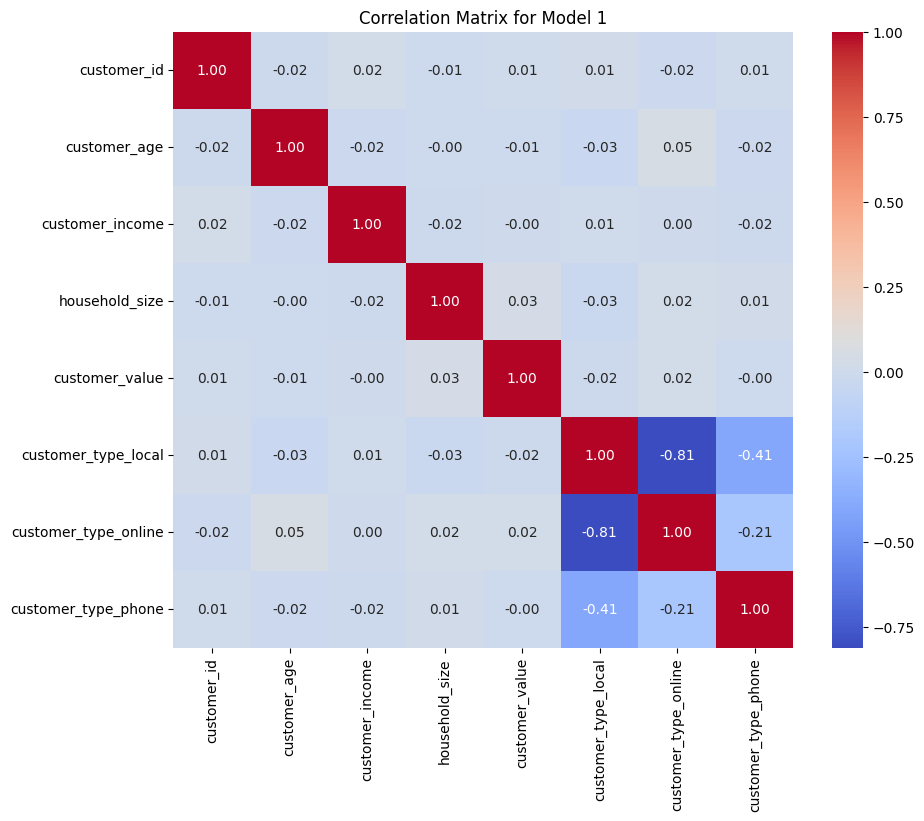

In [57]:
customer_reg = customer_reg[['customer_id', 'customer_age', 'customer_type', 'customer_income', 'household_size', 'customer_value']]
# One-hot encode the 'customer_type' column
customer_reg = pd.get_dummies(customer_reg, columns=['customer_type'], dtype=int)

print('There is Collinearity between two varaibles, these varaibles are between the three customer types of phone, online, and local.\n In my opinion this link will not prove to be significant in terms of the regression.')

cor_cust = customer_reg.corr()
#Print corr matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cor_cust, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Model 1')
plt.show()

In [25]:
# Run the regression analysis
# including the new one-hot encoded columns
results = smf.ols('customer_value ~ customer_age + customer_type_local + customer_type_online + customer_type_phone + customer_income + household_size', data=customer_reg).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_value   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.275
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.272
Time:                        22:10:27   Log-Likelihood:                -51537.
No. Observations:                3914   AIC:                         1.031e+05
Df Residuals:                    3908   BIC:                         1.031e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.774e+04 

#### Model 2

In [47]:
# Perform one-hot encoding on customer_reg DataFrame
value_reg = pd.get_dummies(value_reg, columns=['customer_type'], dtype=int)

In [49]:
# Run the regression analysis
#including one-hot encoded columns
formula_linear = 'customer_value ~ customer_age + customer_type_local + customer_type_online + customer_type_phone + customer_income + household_size + playoff_percentage + spread_favorite_percentage + over_under_percentage + home_team_percentage + avg_bet_amount + ari + atl + bal + buf + car + chi + cin + cle + dal + den + det + gb + hou + ind + jac + kc + lac + lar + lv + mia + min + ne + no + nyg + nyj + over + phi + pit + push + sea + sf + tb + ten + under + was + indoor + rain + retractable_open_roof + snow + grouped_customer_income + grouped_household_size + avg_score_difference + avg_spread_difference + att_stadium + acrisure_stadium + allegiant_stadium + allianz_arena + bank_of_america_stadium + caesars_superdome + empower_field_at_mile_high + estadio_azteca + fedex_field + firstenergy_stadium + ford_field + geha_field_at_arrowhead_stadium + gillette_stadium + hard_rock_stadium + highmark_stadium + lambeau_field + levis_stadium + lincoln_financial_field + lucas_oil_stadium + lumen_field + mt_bank_stadium + mercedesbenz_stadium + metlife_stadium + nrg_stadium + nissan_stadium + paycor_stadium + raymond_james_stadium + sofi_stadium + soldier_field + state_farm_stadium + tiaa_bank_field + tottenham_hotspur_stadium + us_bank_stadium + wembley_stadium + fieldturf + grass + hellas_matrix_turf'

results_linear = sm.OLS.from_formula(formula_linear, data=value_reg).fit()
print(results_linear.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_value   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     1428.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:18:47   Log-Likelihood:            -1.3698e+06
No. Observations:              122979   AIC:                         2.740e+06
Df Residuals:                  122892   BIC:                         2.741e+06
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

#### Revised Model 2

In [50]:
significant_vars = results_linear.pvalues[results_linear.pvalues < 0.05].index.tolist()
formula_linear_refined = 'customer_value ~ ' + ' + '.join(significant_vars)

results_linear_refined = sm.OLS.from_formula(formula_linear_refined, data=value_reg).fit()
print(results_linear_refined.summary())

                            OLS Regression Results                            
Dep. Variable:         customer_value   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.023e+04
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:18:52   Log-Likelihood:            -1.3698e+06
No. Observations:              122979   AIC:                         2.740e+06
Df Residuals:                  122966   BIC:                         2.740e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [51]:
X =  value_reg[significant_vars]
y = value_reg['customer_value']

model = sm.OLS(y, X).fit()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1.0)  # Choose appropriate alpha value
ridge_model.fit(X_train_scaled, y_train)

selector = SelectFromModel(estimator=ridge_model)
selector.fit(X_train_scaled, y_train)
selected_features_ridge = X.columns[selector.get_support()]

X_final = X[selected_features_ridge]
final_model = sm.OLS(y, X_final).fit()

# Print final model summary
print(final_model.summary())

                                 OLS Regression Results                                
Dep. Variable:         customer_value   R-squared (uncentered):                   0.500
Model:                            OLS   Adj. R-squared (uncentered):              0.500
Method:                 Least Squares   F-statistic:                          2.456e+04
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                        0.00
Time:                        23:19:01   Log-Likelihood:                     -1.3700e+06
No. Observations:              122979   AIC:                                  2.740e+06
Df Residuals:                  122974   BIC:                                  2.740e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

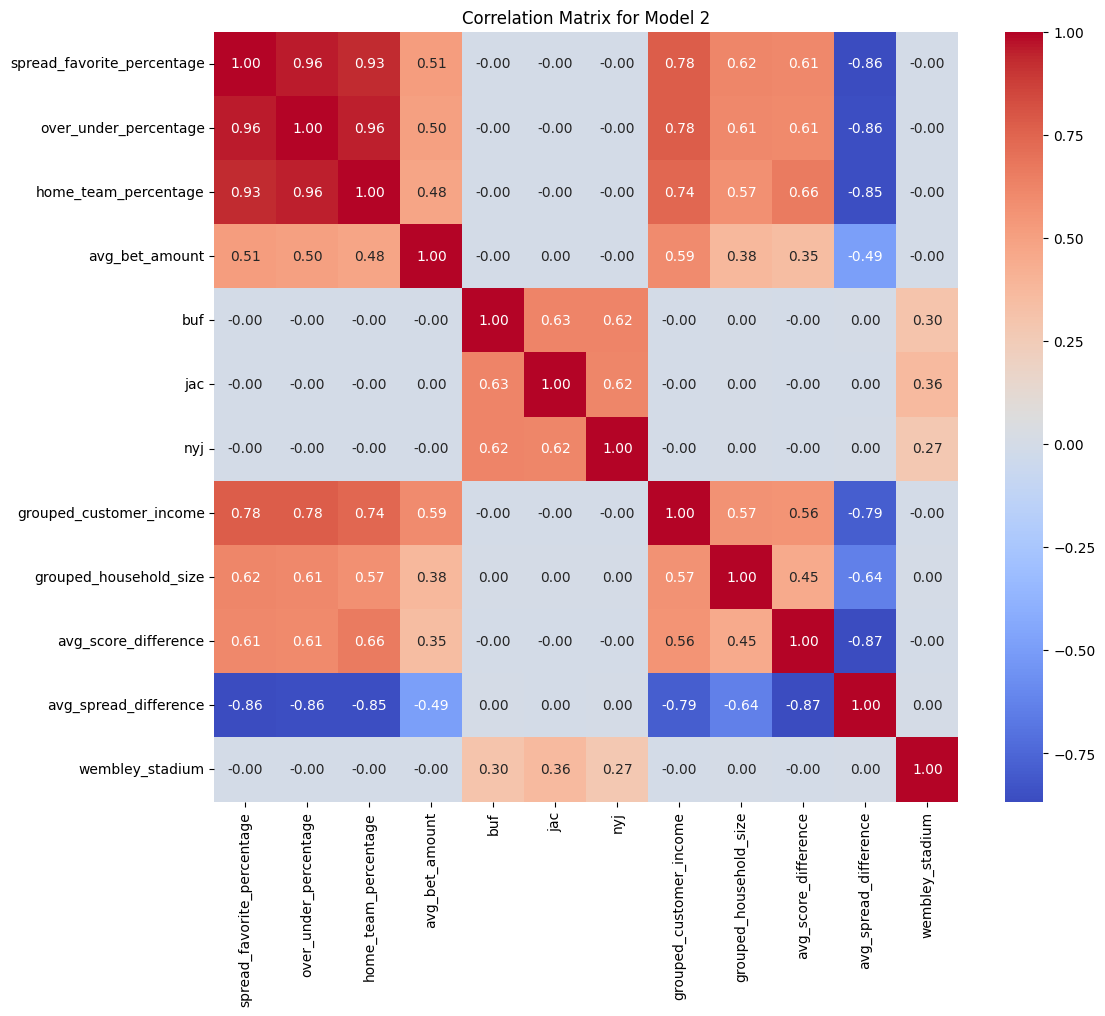

In [53]:
# Check the correlation matrix
cor_val = value_reg[significant_vars].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(cor_val, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Model 2')
plt.show()

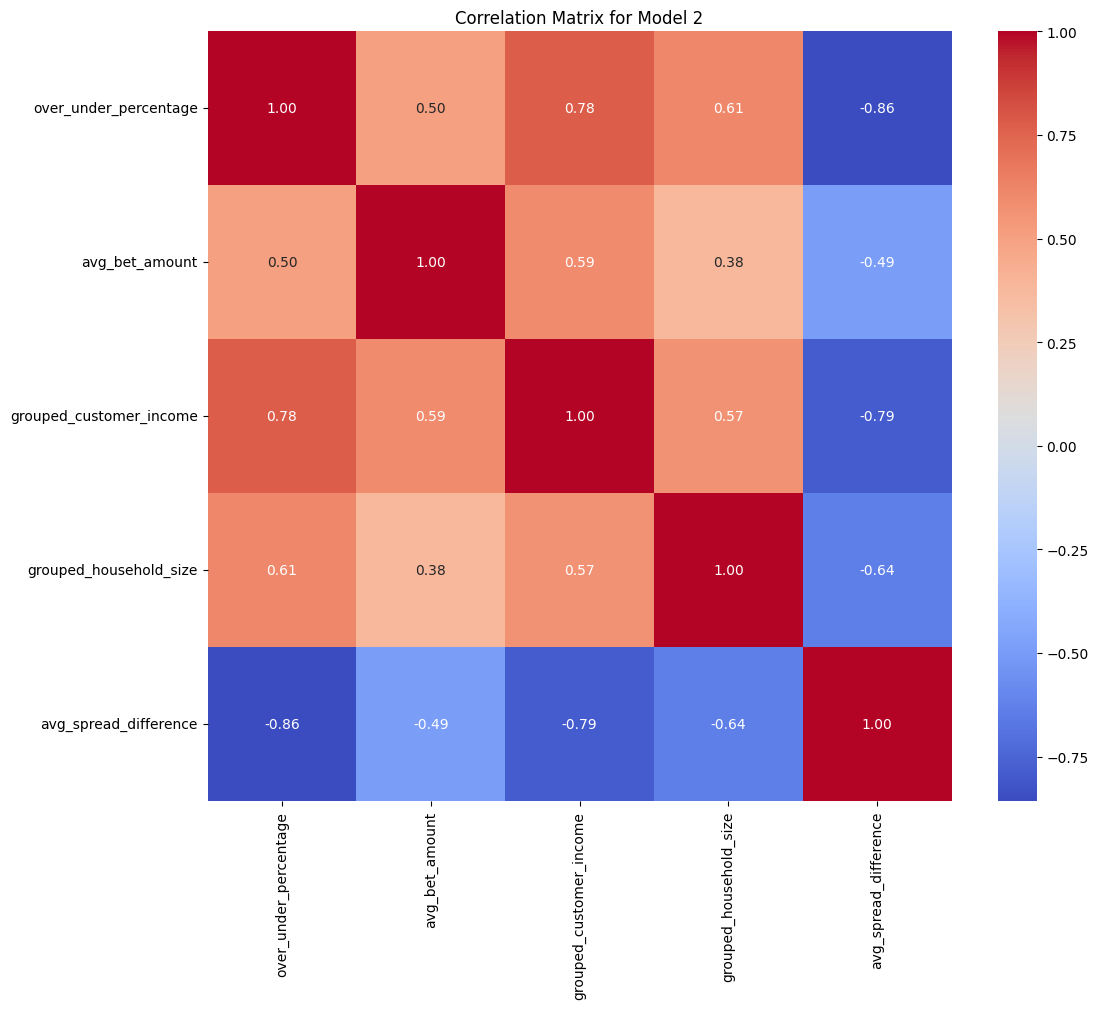

In [54]:
# Check the correlation matrix
cor_val = value_reg[selected_features_ridge].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(cor_val, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Model 2')
plt.show()